In [458]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Loading the Data**

In [459]:
df=pd.read_csv('C:\\Users\mamai\\OneDrive\\Desktop\\capstone\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Overview

In [460]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [461]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have to convert 'TotalCharges' to numeric, coerce errors to handle any non-numeric values

In [463]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [464]:
df.shape[0]

7043

In [465]:
df.shape[1]

21

# Feature Engineering

In [466]:
df['Tenure_MonthlyCharges'] = df['tenure'] * df['MonthlyCharges']
df['Tenure_MonthlyCharges']

0         29.85
1       1936.30
2        107.70
3       1903.50
4        141.40
         ...   
7038    2035.20
7039    7430.40
7040     325.60
7041     297.60
7042    6972.90
Name: Tenure_MonthlyCharges, Length: 7043, dtype: float64

In [467]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges'],
      dtype='object')

In [468]:
df['AvgMonthlyCharge'] = df['TotalCharges'] / df['tenure']
print(df['AvgMonthlyCharge'])

0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Name: AvgMonthlyCharge, Length: 7043, dtype: float64


In [469]:
df['Log_TotalCharges'] = np.log1p(df['TotalCharges'])

In [470]:
# Create tenure groups
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, np.inf], 
                           labels=['0-12 Months', '12-24 Months', '24-48 Months', '48-60 Months', '60+ Months'])


In [471]:
df['TenureGroup'] = df['TenureGroup'].astype('object')

In [472]:
column_dtype = df['TenureGroup'].dtype
column_dtype

dtype('O')

In [473]:
df['TenureGroup'].value_counts()

TenureGroup
0-12 Months     2175
24-48 Months    1594
60+ Months      1407
12-24 Months    1024
48-60 Months     832
Name: count, dtype: int64

In [474]:
df['IsSeniorCitizen'] = df['SeniorCitizen'].astype(int)

In [475]:
df['HasDependentsAndPartner'] = ((df['Dependents'] == True) & (df['Partner'] == True)).astype(int)
df['HasDependentsAndPartner']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: HasDependentsAndPartner, Length: 7043, dtype: int32

In [476]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...  \
0  No phone service             DSL             No  ...   
1                No             DSL            Yes  ...   
2                No             DSL            Yes  ...   
3  No phone service             DSL            Yes  ...   
4                No     Fiber optic             No  ...   

               PaymentMethod MonthlyCharges TotalCharges Churn  \
0           Electronic check          29.85        29.85    No   
1               Mailed check          56.95      1889.50    No   
2               Mailed check          53.85       108.15   Yes   
3  Bank transfer (automatic)          42.30      1840.75    No   
4           Electronic check          70.70       151.65   Yes   

  Tenure_MonthlyCharges AvgMonthlyCharge Log_TotalCharges   TenureGroup  \
0                 29.85        29.850000         3.429137   0-12 Months   
1               1936.30        55.573529         7.544597  24-48 Months   
2                107.70        54.075000         4.692723   0-12 Months   
3               1903.50        40.905556         7.518471  24-48 Months   
4                141.40        75.825000         5.028148   0-12 Months   

   IsSeniorCitizen  HasDependentsAndPartner  
0                0                        0  
1                0                        0  
2                0                        0  
3                0                        0  
4                0                        0  

[5 rows x 27 columns]

In [477]:
column_dtype = df['TenureGroup'].dtype
column_dtype

dtype('O')

# Data Preprocessing

**Missing Values**

Checking for missing values

In [478]:
missing_values=df.isnull().sum()
missing_values

customerID                  0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges               11
Churn                       0
Tenure_MonthlyCharges       0
AvgMonthlyCharge           11
Log_TotalCharges           11
TenureGroup                11
IsSeniorCitizen             0
HasDependentsAndPartner     0
dtype: int64

In [479]:
# List of columns to fill missing values
columns_to_fill = ['TotalCharges', 'AvgMonthlyCharge', 'Log_TotalCharges']

# Fill missing values with the median of each column
for column in columns_to_fill:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)


In [480]:
missing_values=df.isnull().sum()
missing_values

customerID                  0
gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
Churn                       0
Tenure_MonthlyCharges       0
AvgMonthlyCharge            0
Log_TotalCharges            0
TenureGroup                11
IsSeniorCitizen             0
HasDependentsAndPartner     0
dtype: int64

There are no missing values in any column in the dataset

**Encoding Categorical Variables**

The customerID column is a unique identifier for each customer and should be dropped from the modeling process as it doesn't provide any useful information for prediction.

In [481]:
# Drop customerID as it is not useful for modeling
df = df.drop('customerID', axis=1)

In [482]:
missing=df.isnull().sum()
missing

gender                      0
SeniorCitizen               0
Partner                     0
Dependents                  0
tenure                      0
PhoneService                0
MultipleLines               0
InternetService             0
OnlineSecurity              0
OnlineBackup                0
DeviceProtection            0
TechSupport                 0
StreamingTV                 0
StreamingMovies             0
Contract                    0
PaperlessBilling            0
PaymentMethod               0
MonthlyCharges              0
TotalCharges                0
Churn                       0
Tenure_MonthlyCharges       0
AvgMonthlyCharge            0
Log_TotalCharges            0
TenureGroup                11
IsSeniorCitizen             0
HasDependentsAndPartner     0
dtype: int64

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7043 non-null   object 
 1   SeniorCitizen            7043 non-null   int64  
 2   Partner                  7043 non-null   object 
 3   Dependents               7043 non-null   object 
 4   tenure                   7043 non-null   int64  
 5   PhoneService             7043 non-null   object 
 6   MultipleLines            7043 non-null   object 
 7   InternetService          7043 non-null   object 
 8   OnlineSecurity           7043 non-null   object 
 9   OnlineBackup             7043 non-null   object 
 10  DeviceProtection         7043 non-null   object 
 11  TechSupport              7043 non-null   object 
 12  StreamingTV              7043 non-null   object 
 13  StreamingMovies          7043 non-null   object 
 14  Contract                

In [484]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure_MonthlyCharges',
       'AvgMonthlyCharge', 'Log_TotalCharges', 'TenureGroup',
       'IsSeniorCitizen', 'HasDependentsAndPartner'],
      dtype='object')

In [485]:
cat_cols=df.select_dtypes(include=['object']).columns
print("Categorical Variables:")
print(cat_cols)

Categorical Variables:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'TenureGroup'],
      dtype='object')


In [486]:
num_cols = df.select_dtypes(include=['float64','int64'])
num_cols

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0                 0       1           29.85         29.85   
1                 0      34           56.95       1889.50   
2                 0       2           53.85        108.15   
3                 0      45           42.30       1840.75   
4                 0       2           70.70        151.65   
...             ...     ...             ...           ...   
7038              0      24           84.80       1990.50   
7039              0      72          103.20       7362.90   
7040              0      11           29.60        346.45   
7041              1       4           74.40        306.60   
7042              0      66          105.65       6844.50   

      Tenure_MonthlyCharges  AvgMonthlyCharge  Log_TotalCharges  
0                     29.85         29.850000          3.429137  
1                   1936.30         55.573529          7.544597  
2                    107.70         54.075000          4.692723  
3                   1903.50         40.905556          7.518471  
4                    141.40         75.825000          5.028148  
...                     ...               ...               ...  
7038                2035.20         82.937500          7.596643  
7039                7430.40        102.262500          8.904345  
7040                 325.60         31.495455          5.850621  
7041                 297.60         76.650000          5.728800  
7042                6972.90        103.704545          8.831347  

[7043 rows x 7 columns]

**Encoding**

One Hot Encoding and Label Encoding are going to be used. ONe-Hot encoding will be used where there is no inherent order between values in a category. Label encoding on the other hand will be used for the churn column since it is the target variable. "Yes" will be encoded as 1 and "No" as 0.

**One-Hot Encoding:** gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod


**Label Encoding:** Churn (as the target variable)

In [487]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

One-Hot Encoding

In [488]:
#Initializing one-hot encoding
one_hot_cols =['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [489]:
# Applying OneHotEncoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

Label Encoding

In [490]:
#Initializing label encoding
label_col ='Churn'

In [491]:
#pplying Label Encoding
label_encoder = LabelEncoder()
df[label_col] = label_encoder.fit_transform(df[label_col])

In [492]:
print(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges', 'AvgMonthlyCharge', 'Log_TotalCharges',
       'TenureGroup', 'IsSeniorCitizen', 'HasDependentsAndPartner',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
 

In [493]:
# Check the data type of tenure group column
column_dtype = df['TenureGroup'].dtype
column_dtype

dtype('O')

In [494]:
column_dtype = df['TenureGroup'].dtype
column_dtype

dtype('O')

In [495]:
df['TenureGroup'].value_counts()

TenureGroup
0-12 Months     2175
24-48 Months    1594
60+ Months      1407
12-24 Months    1024
48-60 Months     832
Name: count, dtype: int64

In [496]:
ordinal_categories=['0-12 Months', '12-24 Months', '24-48 Months', '48-60 Months', '60+ Months','nan']

In [497]:
df.dropna(subset=['TenureGroup'], inplace=True)

In [498]:
# Fill missing values with 'Unknown' for categorical columns
df['TenureGroup'].fillna('Unknown', inplace=True)

In [499]:
# Check for NaNs
print(df.isna().sum())

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Tenure_MonthlyCharges                    0
AvgMonthlyCharge                         0
Log_TotalCharges                         0
TenureGroup                              0
IsSeniorCitizen                          0
HasDependentsAndPartner                  0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProte

In [500]:
df['TenureGroup'].value_counts()

TenureGroup
0-12 Months     2175
24-48 Months    1594
60+ Months      1407
12-24 Months    1024
48-60 Months     832
Name: count, dtype: int64

In [501]:
# Example: Fill NaNs with a specific value or drop rows/columns
df = df.fillna('Unknown')  # or df.dropna() depending on your strategy

In [502]:
tenure_encoder = LabelEncoder()
tenure_encoder = LabelEncoder().fit(ordinal_categories)
df['TenureGroup'] = tenure_encoder.transform(df['TenureGroup'])

In [503]:
df.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0              0       1           29.85         29.85      0   
1              0      34           56.95       1889.50      0   
2              0       2           53.85        108.15      1   
3              0      45           42.30       1840.75      0   
4              0       2           70.70        151.65      1   

   Tenure_MonthlyCharges  AvgMonthlyCharge  Log_TotalCharges  TenureGroup  \
0                  29.85         29.850000          3.429137            0   
1                1936.30         55.573529          7.544597            2   
2                 107.70         54.075000          4.692723            0   
3                1903.50         40.905556          7.518471            2   
4                 141.40         75.825000          5.028148            0   

   IsSeniorCitizen  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0                0  ...                            False            False   
1                0  ...                            False            False   
2                0  ...                            False            False   
3                0  ...                            False            False   
4                0  ...                            False            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 37 columns]

In [504]:
df.to_csv('Telco-Customer-Churn-Preprocessed.csv', index=False)

**Scaling numerical features**

Standardized Scaling

In [505]:
from sklearn.preprocessing import StandardScaler

In [506]:
# Load your dataset
df = pd.read_csv('Telco-Customer-Churn-Preprocessed.csv')

In [507]:
df.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0              0       1           29.85         29.85      0   
1              0      34           56.95       1889.50      0   
2              0       2           53.85        108.15      1   
3              0      45           42.30       1840.75      0   
4              0       2           70.70        151.65      1   

   Tenure_MonthlyCharges  AvgMonthlyCharge  Log_TotalCharges  TenureGroup  \
0                  29.85         29.850000          3.429137            0   
1                1936.30         55.573529          7.544597            2   
2                 107.70         54.075000          4.692723            0   
3                1903.50         40.905556          7.518471            2   
4                 141.40         75.825000          5.028148            0   

   IsSeniorCitizen  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0                0  ...                            False            False   
1                0  ...                            False            False   
2                0  ...                            False            False   
3                0  ...                            False            False   
4                0  ...                            False            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 37 columns]

In [508]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges', 'AvgMonthlyCharge', 'Log_TotalCharges',
       'TenureGroup', 'IsSeniorCitizen', 'HasDependentsAndPartner',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
 

In [509]:
# List of numerical columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [510]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the scaled data
df.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  \
0              0 -1.280248       -1.161694     -0.994194      0   
1              0  0.064303       -0.260878     -0.173740      0   
2              0 -1.239504       -0.363923     -0.959649      1   
3              0  0.512486       -0.747850     -0.195248      0   
4              0 -1.239504        0.196178     -0.940457      1   

   Tenure_MonthlyCharges  AvgMonthlyCharge  Log_TotalCharges  TenureGroup  \
0                  29.85         29.850000          3.429137            0   
1                1936.30         55.573529          7.544597            2   
2                 107.70         54.075000          4.692723            0   
3                1903.50         40.905556          7.518471            2   
4                 141.40         75.825000          5.028148            0   

   IsSeniorCitizen  ...  StreamingTV_No internet service  StreamingTV_Yes  \
0                0  ...                            False            False   
1                0  ...                            False            False   
2                0  ...                            False            False   
3                0  ...                            False            False   
4                0  ...                            False            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 37 columns]

# Exploratory Data Analysis

**Missing Values**

In [511]:
missing_values=df.isnull().sum()
missing_values

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Tenure_MonthlyCharges                    0
AvgMonthlyCharge                         0
Log_TotalCharges                         0
TenureGroup                              0
IsSeniorCitizen                          0
HasDependentsAndPartner                  0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProte

There are missing values in the total charges column, since its a numerical column, we fill it using the mean/,median

Finding the Number of Unique Values

In [512]:
df.nunique()

SeniorCitizen                               2
tenure                                     72
MonthlyCharges                           1584
TotalCharges                             6530
Churn                                       2
Tenure_MonthlyCharges                    6017
AvgMonthlyCharge                         6569
Log_TotalCharges                         6530
TenureGroup                                 5
IsSeniorCitizen                             2
HasDependentsAndPartner                     1
gender_Male                                 2
Partner_Yes                                 2
Dependents_Yes                              2
PhoneService_Yes                            2
MultipleLines_No phone service              2
MultipleLines_Yes                           2
InternetService_Fiber optic                 2
InternetService_No                          2
OnlineSecurity_No internet service          2
OnlineSecurity_Yes                          2
OnlineBackup_No internet service  

**Statistical Summary**

In [513]:
df.describe()

SeniorCitizen        tenure  MonthlyCharges  TotalCharges        Churn  \
count    7032.000000  7.032000e+03    7.032000e+03  7.032000e+03  7032.000000   
mean        0.162400 -1.126643e-16    6.062651e-17 -1.119064e-16     0.265785   
std         0.368844  1.000071e+00    1.000071e+00  1.000071e+00     0.441782   
min         0.000000 -1.280248e+00   -1.547283e+00 -9.990692e-01     0.000000   
25%         0.000000 -9.542963e-01   -9.709769e-01 -8.302488e-01     0.000000   
50%         0.000000 -1.394171e-01    1.845440e-01 -3.908151e-01     0.000000   
75%         0.000000  9.199259e-01    8.331482e-01  6.668271e-01     1.000000   
max         1.000000  1.612573e+00    1.793381e+00  2.824261e+00     1.000000   

       Tenure_MonthlyCharges  AvgMonthlyCharge  Log_TotalCharges  TenureGroup  \
count            7032.000000       7032.000000       7032.000000  7032.000000   
mean             2283.147248         64.799424          6.943387     1.754266   
std              2264.703327         30.185891          1.546438     1.497135   
min                18.800000         13.775000          2.985682     0.000000   
25%               397.800000         36.179891          5.997571     0.000000   
50%              1394.575000         70.373239          7.243138     2.000000   
75%              3791.250000         90.179560          8.241634     3.000000   
max              8550.000000        121.400000          9.069445     4.000000   

       IsSeniorCitizen  HasDependentsAndPartner  
count      7032.000000                   7032.0  
mean          0.162400                      0.0  
std           0.368844                      0.0  
min           0.000000                      0.0  
25%           0.000000                      0.0  
50%           0.000000                      0.0  
75%           0.000000                      0.0  
max           1.000000                      0.0

In [514]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64','int64'])
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  \
0                 0 -1.280248       -1.161694     -0.994194      0   
1                 0  0.064303       -0.260878     -0.173740      0   
2                 0 -1.239504       -0.363923     -0.959649      1   
3                 0  0.512486       -0.747850     -0.195248      0   
4                 0 -1.239504        0.196178     -0.940457      1   
...             ...       ...             ...           ...    ...   
7027              0 -0.343137        0.664868     -0.129180      0   
7028              0  1.612573        1.276493      2.241056      0   
7029              0 -0.872808       -1.170004     -0.854514      0   
7030              1 -1.158016        0.319168     -0.872095      1   
7031              0  1.368109        1.357932      2.012344      0   

      Tenure_MonthlyCharges  AvgMonthlyCharge  Log_TotalCharges  TenureGroup  \
0        

**Distribution Of Churn**


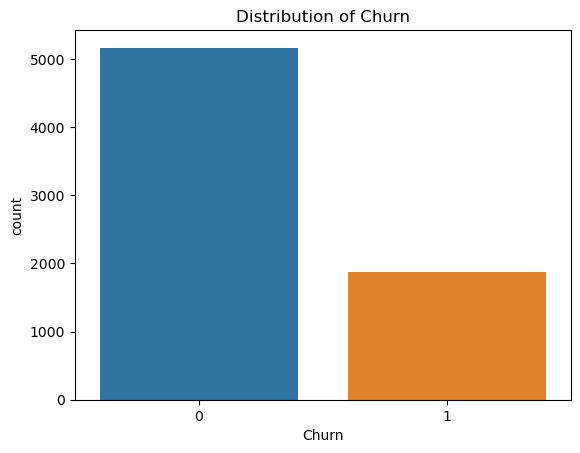

In [515]:
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

Finding the percentage of customers who churned


In [516]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

**Skew**

SeniorCitizen
Skew : 1.83


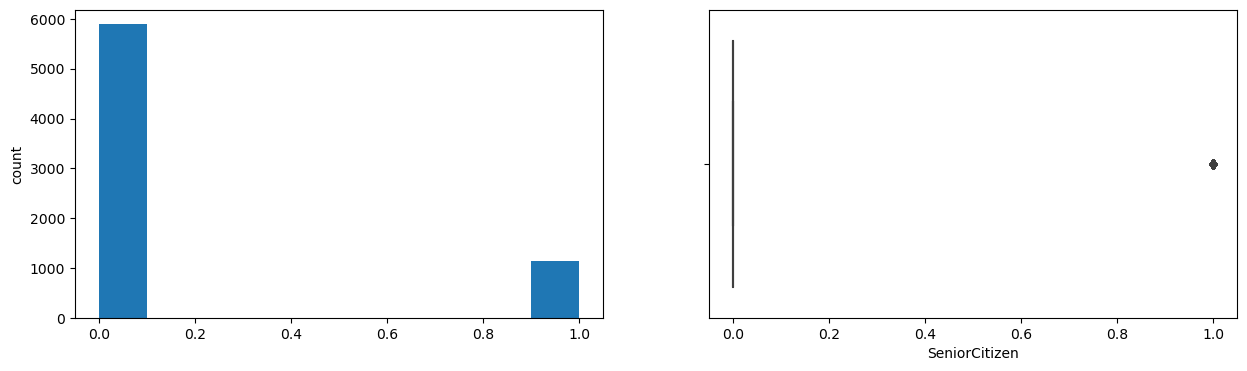

tenure
Skew : 0.24


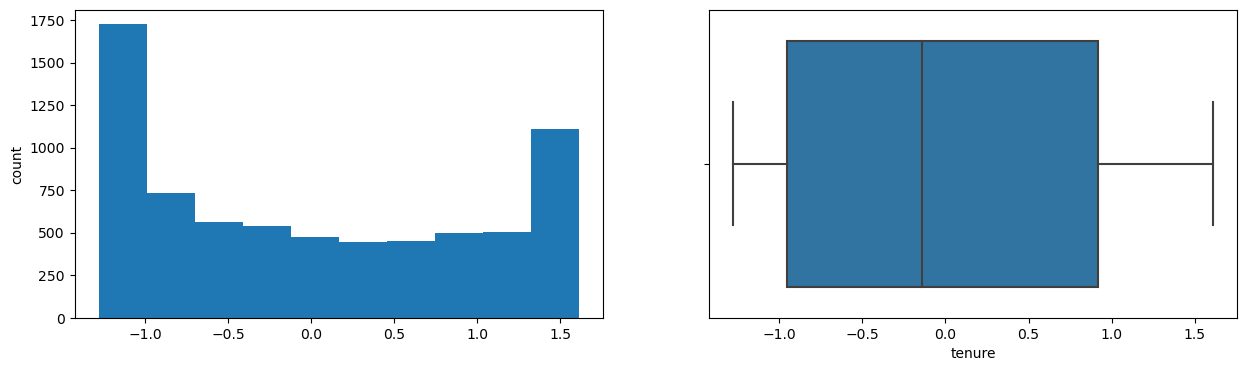

MonthlyCharges
Skew : -0.22


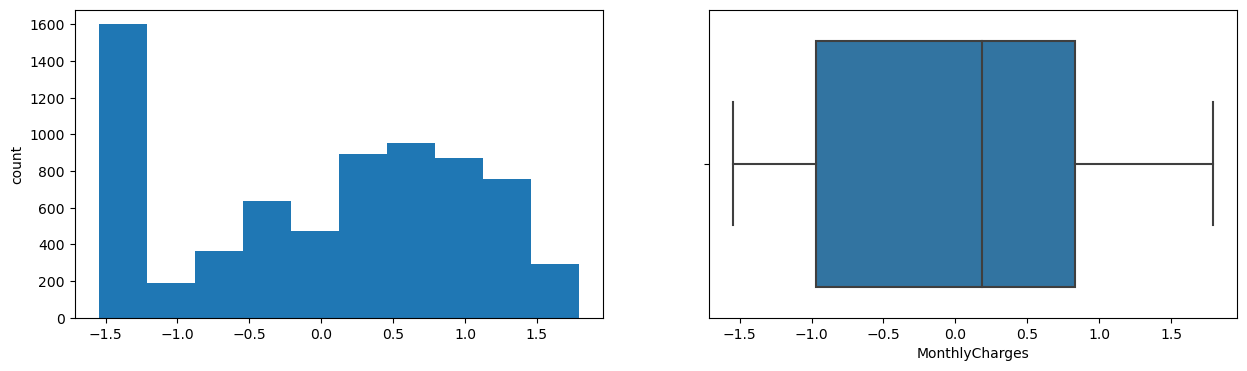

TotalCharges
Skew : 0.96


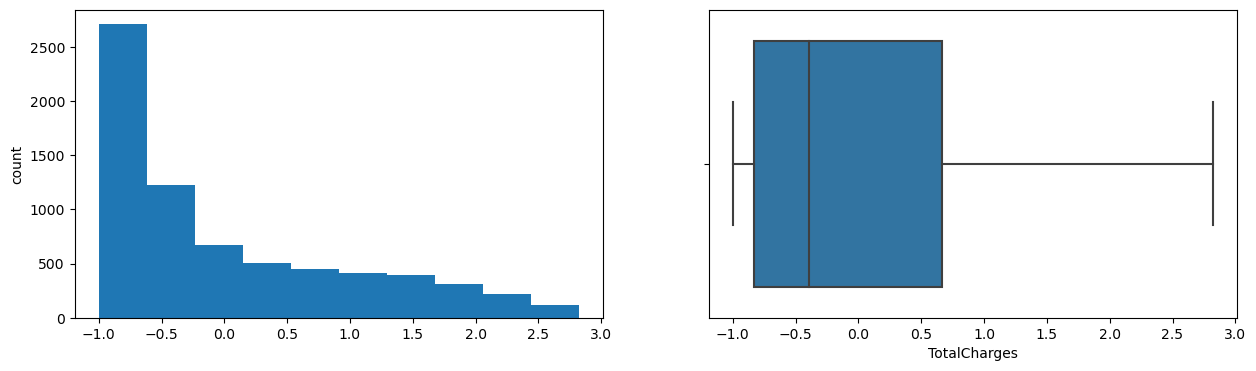

Churn
Skew : 1.06


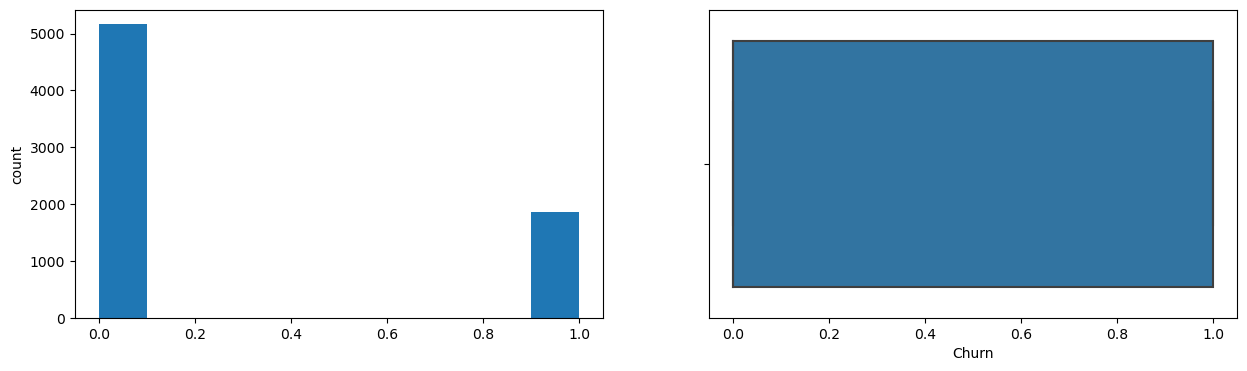

Tenure_MonthlyCharges
Skew : 0.96


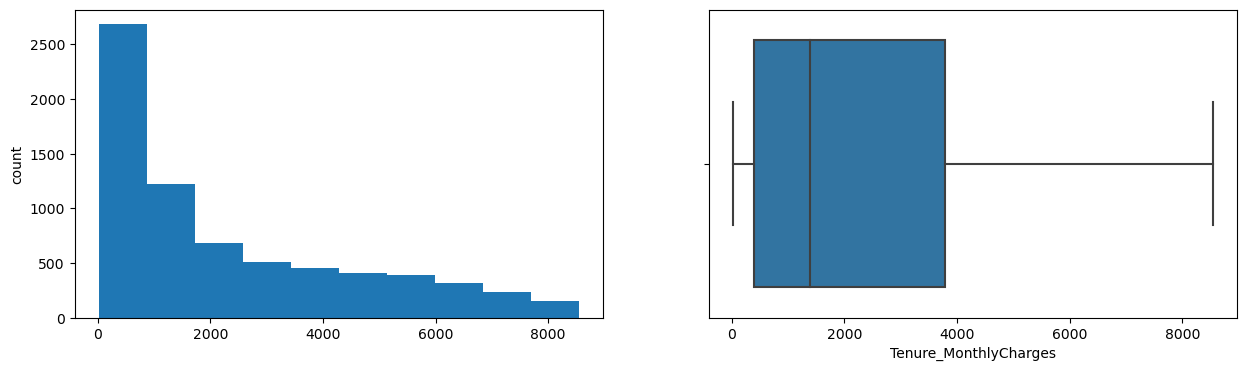

AvgMonthlyCharge
Skew : -0.21


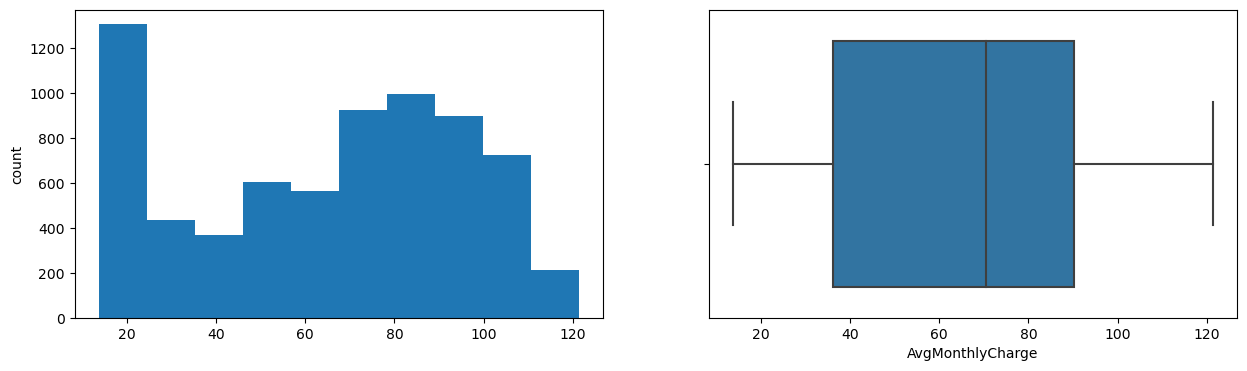

Log_TotalCharges
Skew : -0.74


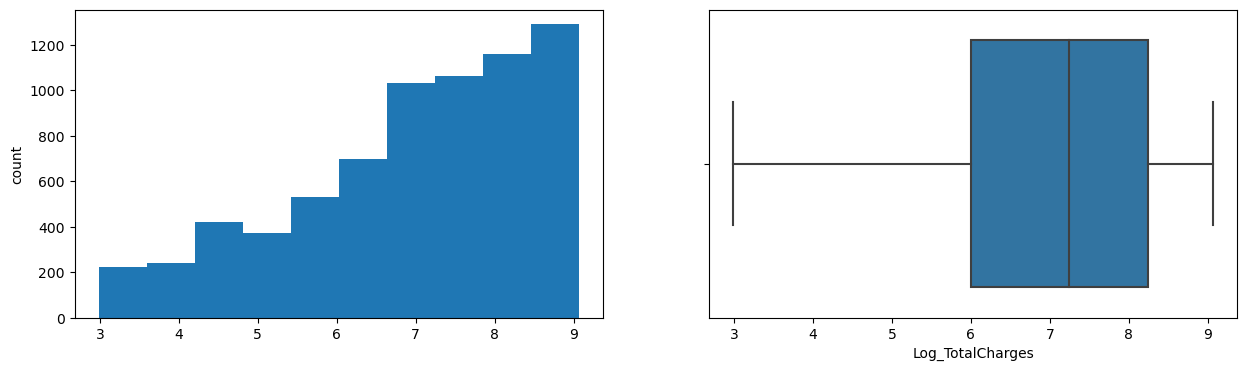

TenureGroup
Skew : 0.23


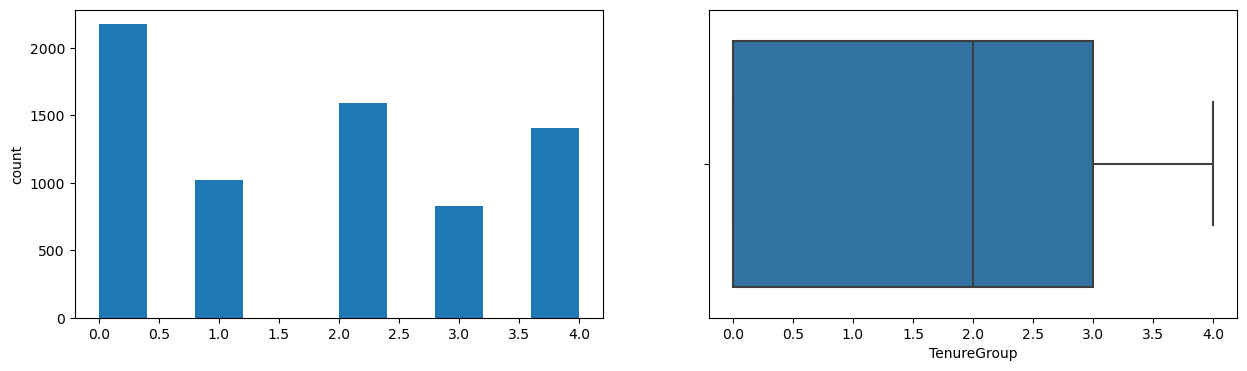

IsSeniorCitizen
Skew : 1.83


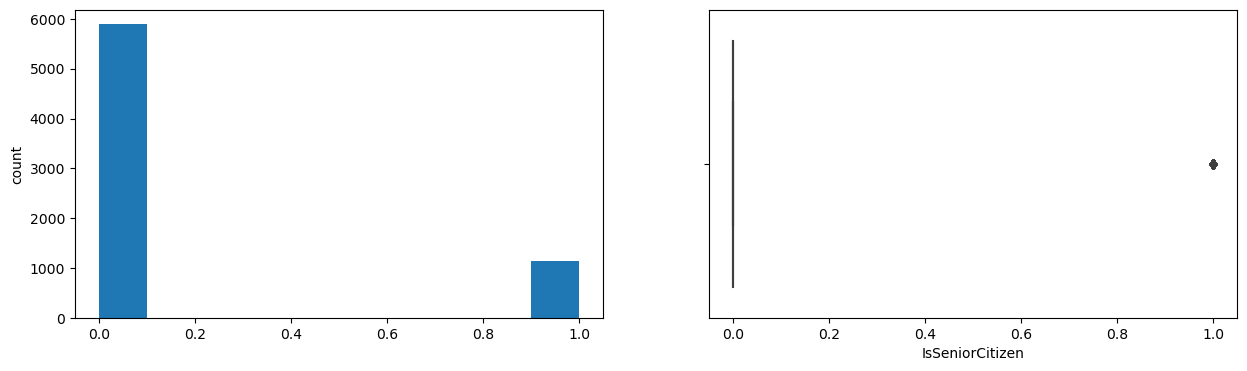

HasDependentsAndPartner
Skew : 0


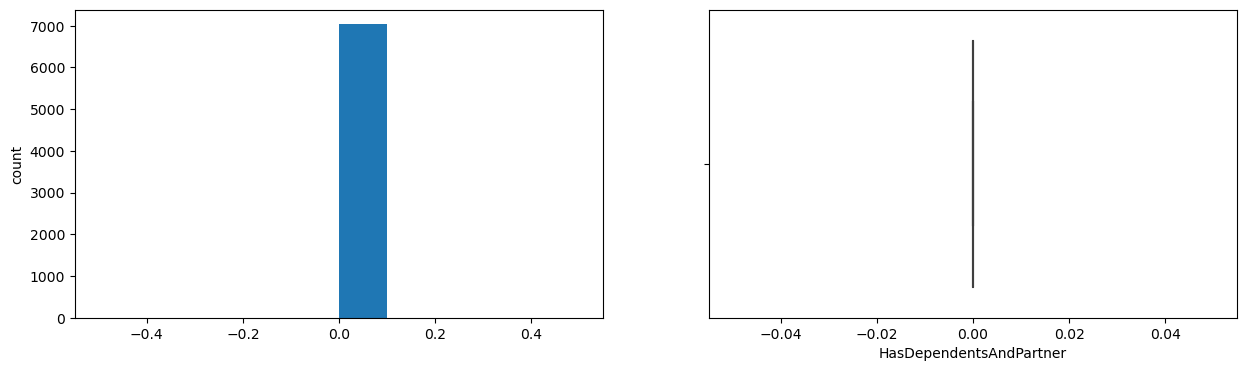

In [517]:
#finding skew
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

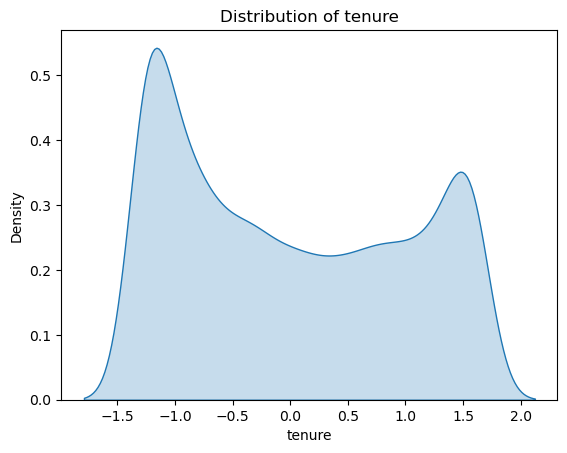

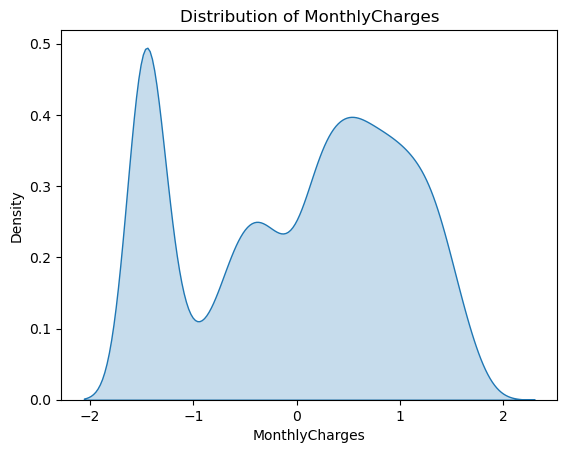

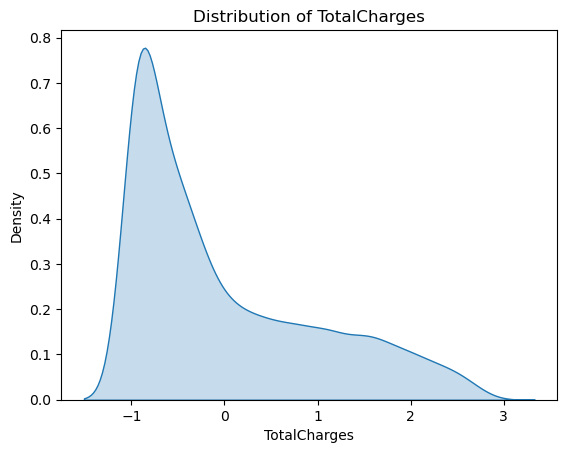

In [518]:
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Distribution of {column}')
    plt.show()


**Here's a summary of the key findings:**

**Variable Distributions**

* **SeniorCitizen:** A categorical variable with a majority of individuals not being senior citizens.
* **tenure:** A numerical variable skewed to the right, indicating a larger proportion of customers with shorter tenures.
* **MonthlyCharges:** A numerical variable skewed to the right, indicating a larger proportion of customers with lower monthly charges.
* **TotalCharges:** A numerical variable skewed to the right, indicating a larger proportion of customers with lower total charges.

**General Observations**

* **Outliers:** No outliers were found in any of the variables.
* **Distribution Patterns:** All variables exhibited a right-skewed distribution, suggesting a concentration of values at the lower end of the range.
* **Median Values:** The median values for tenure, monthly charges, and total charges were relatively moderate, suggesting a central tendency towards the middle of the range.
* **Percentile Ranges:** The box plots provided insights into the spread of the data. For example, the box for tenure showed a significant portion of customers with tenures between 15 and 45 months.

**Overall, the analysis indicates that the dataset contains a customer base with a mix of short- and long-tenured customers, with a general tendency towards lower monthly and total charges. The lack of outliers suggests a relatively consistent distribution of these variables.**


c:\Users\mamai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


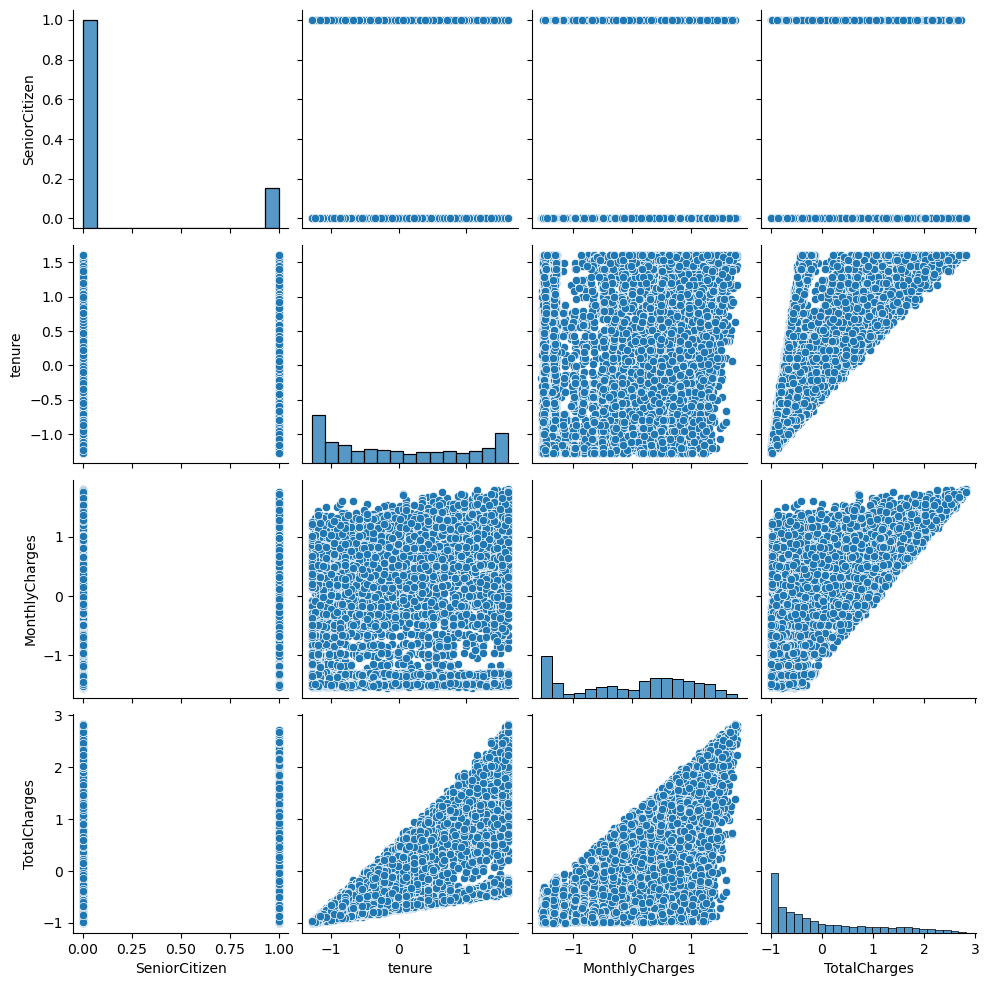

In [519]:
sns.pairplot(df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']])
plt.show()

**Key Observations:**

* **SeniorCitizen:** This variable is categorical, and its distribution is shown on the diagonal. The majority of observations have a value of 0 (not a senior citizen), with a smaller number having a value of 1 (senior citizen).
* **tenure:** This variable is numerical and has a right-skewed distribution, indicating a larger proportion of customers with shorter tenures.
* **MonthlyCharges:** This variable is also numerical and has a right-skewed distribution, suggesting a larger proportion of customers with lower monthly charges.
* **TotalCharges:** This variable is numerical and also has a right-skewed distribution, similar to MonthlyCharges, indicating a larger proportion of customers with lower total charges.

**Relationships Between Variables:**

* **SeniorCitizen vs. other variables:** There is no clear relationship between SeniorCitizen and the other variables. The scatter plots show a random distribution of points.
* **tenure vs. other variables:** There appears to be a positive correlation between tenure and MonthlyCharges. As tenure increases, MonthlyCharges tend to increase as well. Similarly, there is a positive correlation between tenure and TotalCharges, suggesting that customers with longer tenures have higher total charges.
* **MonthlyCharges vs. TotalCharges:** There is a strong positive correlation between MonthlyCharges and TotalCharges, as expected. As MonthlyCharges increase, TotalCharges also increase.

**Overall, the pair plot provides a visual representation of the relationships between the variables. While there is a clear positive correlation between tenure and both MonthlyCharges and TotalCharges, there is no significant relationship between SeniorCitizen and the other variables.**

**Correlation Analysis**

In [520]:
# Correlation matrix
corr_matrix = num_cols.corr()
corr_matrix

SeniorCitizen    tenure  MonthlyCharges  \
SeniorCitizen                 1.000000  0.015683        0.219874   
tenure                        0.015683  1.000000        0.246862   
MonthlyCharges                0.219874  0.246862        1.000000   
TotalCharges                  0.102411  0.825880        0.651065   
Churn                         0.150541 -0.354049        0.192858   
Tenure_MonthlyCharges         0.102665  0.826271        0.651458   
AvgMonthlyCharge              0.217616  0.246198        0.996237   
Log_TotalCharges              0.100838  0.833932        0.574763   
TenureGroup                   0.018449  0.981313        0.243838   
IsSeniorCitizen               1.000000  0.015683        0.219874   
HasDependentsAndPartner            NaN       NaN             NaN   

                         TotalCharges     Churn  Tenure_MonthlyCharges  \
SeniorCitizen                0.102411  0.150541               0.102665   
tenure                       0.825880 -0.354049               0.826271   
MonthlyCharges               0.651065  0.192858               0.651458   
TotalCharges                 1.000000 -0.199484               0.999560   
Churn                       -0.199484  1.000000              -0.199675   
Tenure_MonthlyCharges        0.999560 -0.199675               1.000000   
AvgMonthlyCharge             0.650915  0.192033               0.649607   
Log_TotalCharges             0.832262 -0.241908               0.832343   
TenureGroup                  0.811749 -0.344646               0.812254   
IsSeniorCitizen              0.102411  0.150541               0.102665   
HasDependentsAndPartner           NaN       NaN                    NaN   

                         AvgMonthlyCharge  Log_TotalCharges  TenureGroup  \
SeniorCitizen                    0.217616          0.100838     0.018449   
tenure                           0.246198          0.833932     0.981313   
MonthlyCharges                   0.996237          0.574763     0.243838   
TotalCharges                     0.650915          0.832262     0.811749   
Churn                            0.192033         -0.241908    -0.344646   
Tenure_MonthlyCharges            0.649607          0.832343     0.812254   
AvgMonthlyCharge                 1.000000          0.574837     0.242831   
Log_TotalCharges                 0.574837          1.000000     0.813522   
TenureGroup                      0.242831          0.813522     1.000000   
IsSeniorCitizen                  0.217616          0.100838     0.018449   
HasDependentsAndPartner               NaN               NaN          NaN   

                         IsSeniorCitizen  HasDependentsAndPartner  
SeniorCitizen                   1.000000                      NaN  
tenure                          0.015683                      NaN  
MonthlyCharges                  0.219874                      NaN  
TotalCharges                    0.102411                      NaN  
Churn                           0.150541                      NaN  
Tenure_MonthlyCharges           0.102665                      NaN  
AvgMonthlyCharge                0.217616                      NaN  
Log_TotalCharges                0.100838                      NaN  
TenureGroup                     0.018449                      NaN  
IsSeniorCitizen                 1.000000                      NaN  
HasDependentsAndPartner              NaN                      NaN

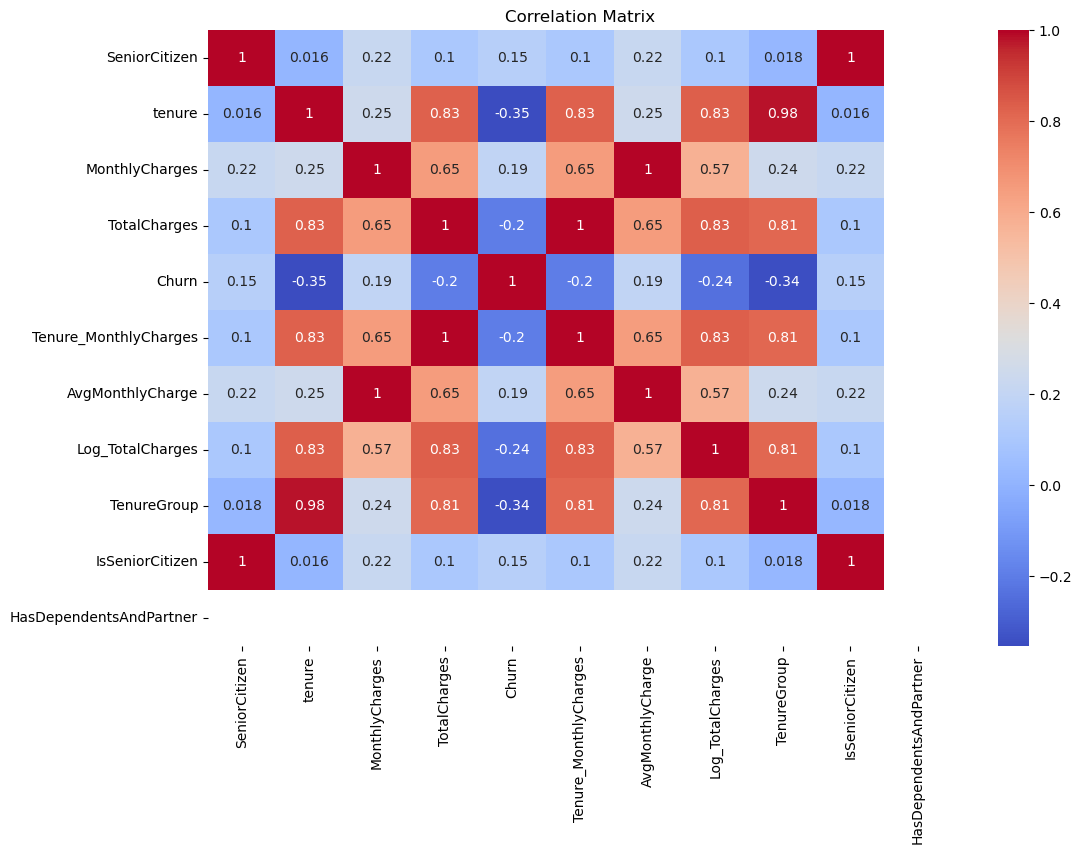

In [521]:
# Heatmap for visualizing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Key Observations:**

* **SeniorCitizen:** This variable has a weak positive correlation with tenure (0.017) and a very weak positive correlation with MonthlyCharges (0.1) and TotalCharges (0.22). This suggests that being a senior citizen has a minimal impact on tenure, monthly charges, and total charges.
* **tenure:** This variable has a moderate positive correlation with MonthlyCharges (0.25) and a strong positive correlation with TotalCharges (0.83). This indicates that customers with longer tenures tend to have higher monthly charges and total charges.
* **MonthlyCharges:** This variable has a strong positive correlation with TotalCharges (0.65), as expected. Customers with higher monthly charges will also have higher total charges.

**Overall, the correlation matrix confirms the findings from the pair plot:**

* There is a strong positive relationship between tenure and both MonthlyCharges and TotalCharges.
* There is no significant relationship between SeniorCitizen and the other variables.

**In conclusion, the analysis indicates that customer tenure is a strong predictor of both monthly charges and total charges, while being a senior citizen has a minimal impact on these variables.**

**Analyzing Categorical Features**

In [522]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

In [523]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges', 'AvgMonthlyCharge', 'Log_TotalCharges',
       'TenureGroup', 'IsSeniorCitizen', 'HasDependentsAndPartner',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
 

Count Plots


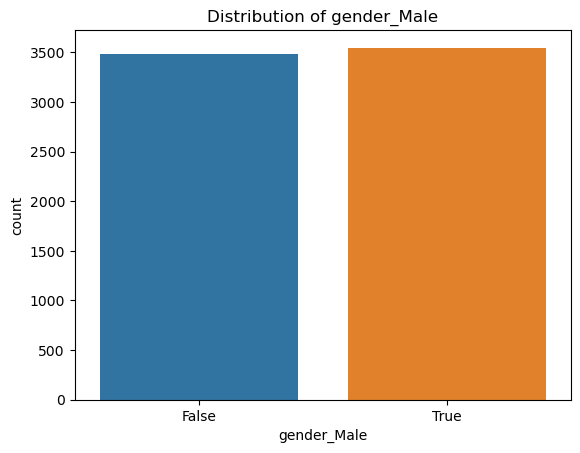

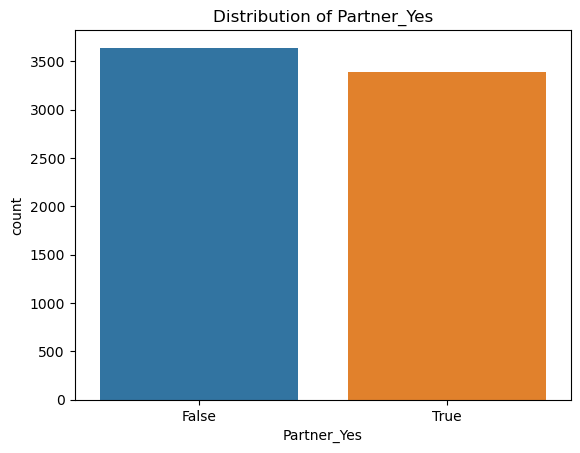

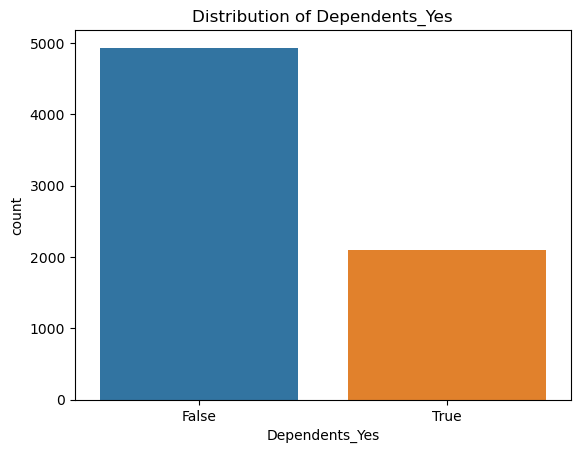

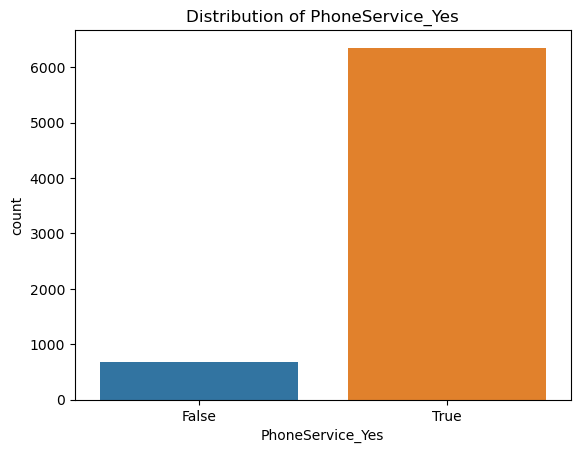

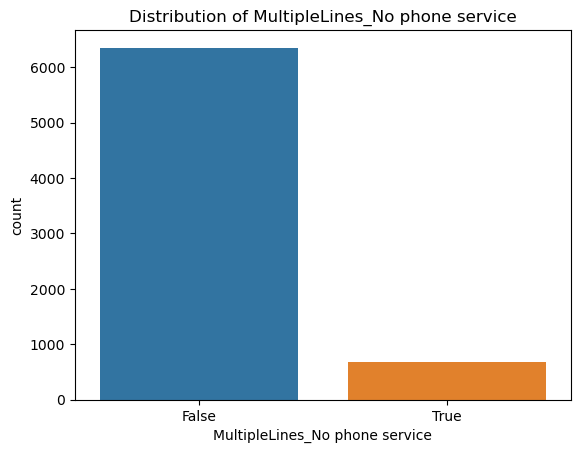

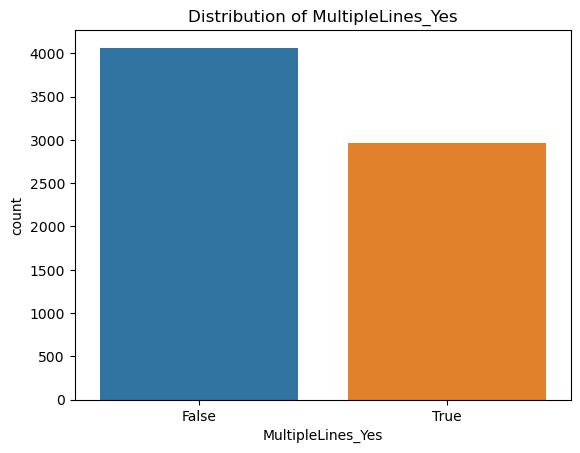

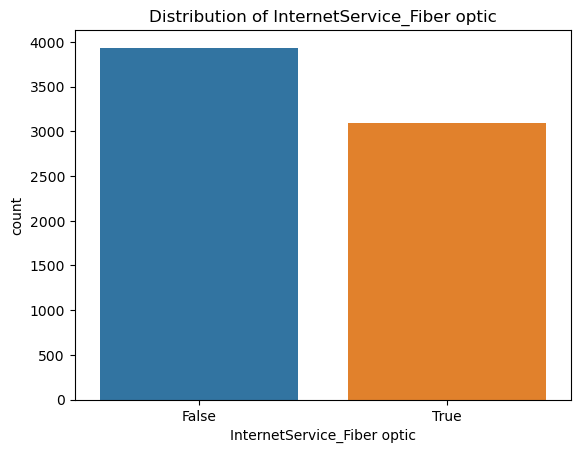

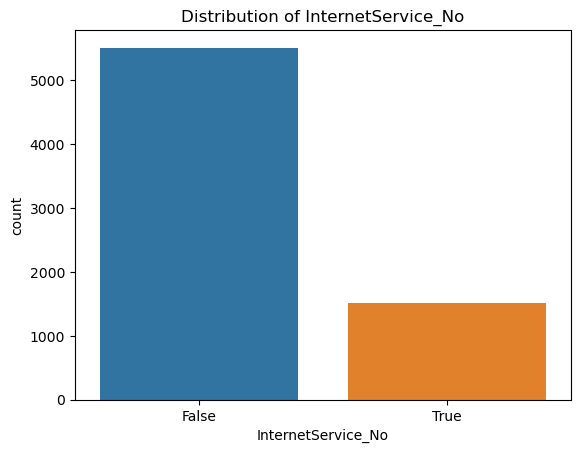

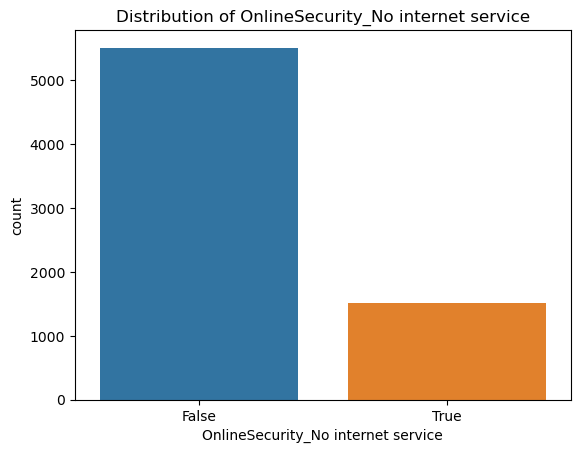

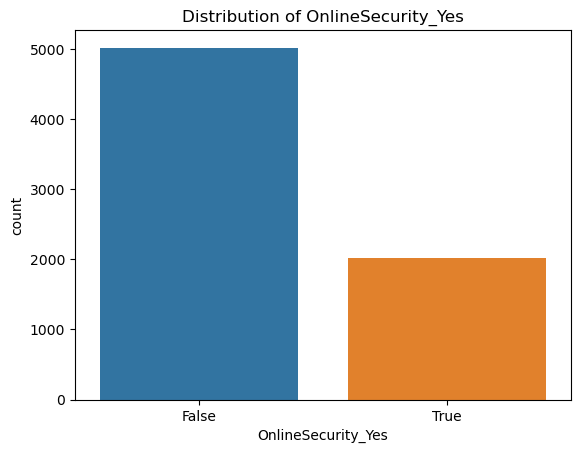

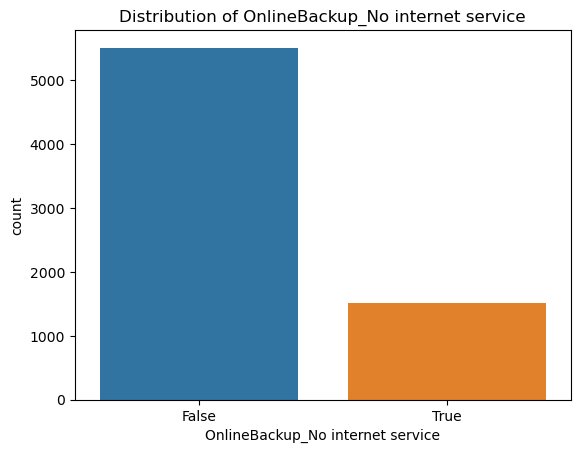

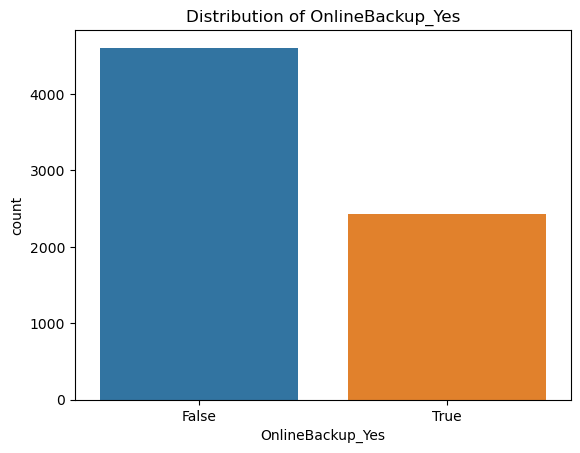

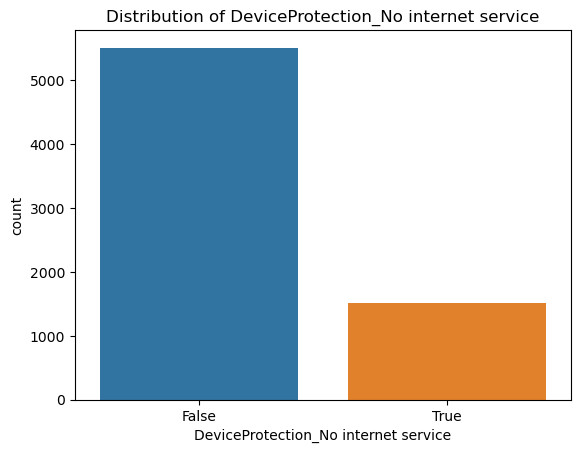

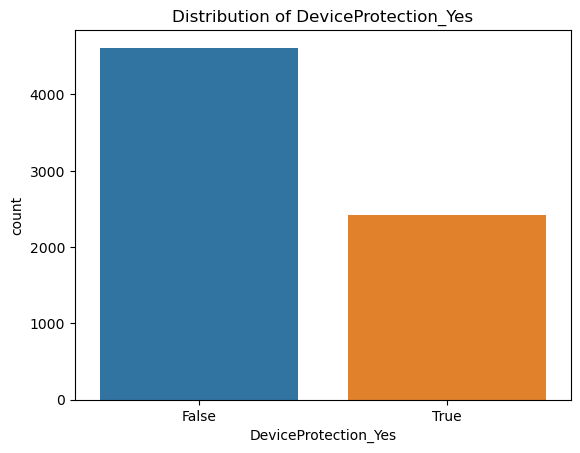

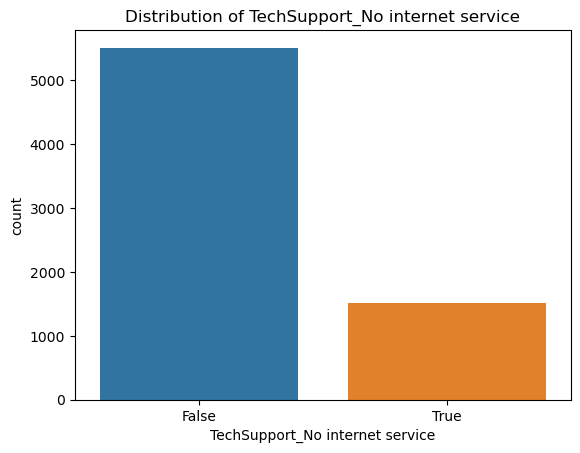

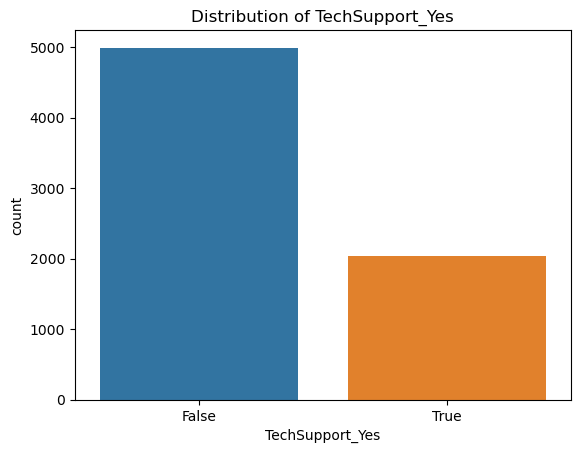

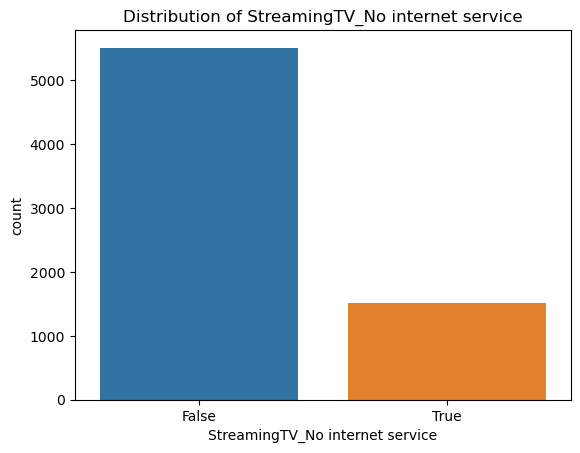

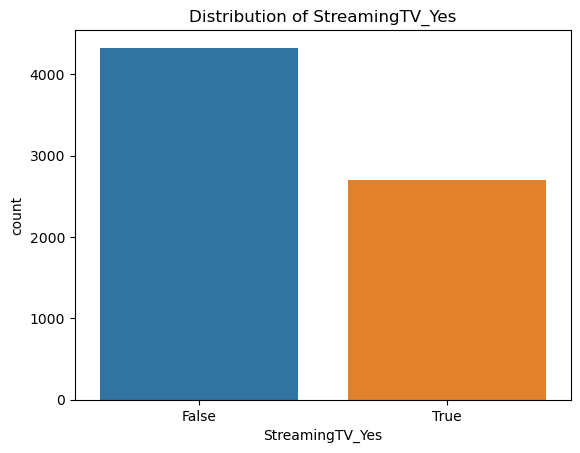

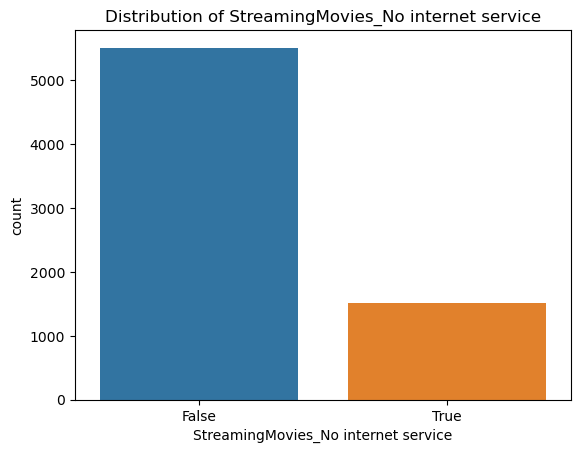

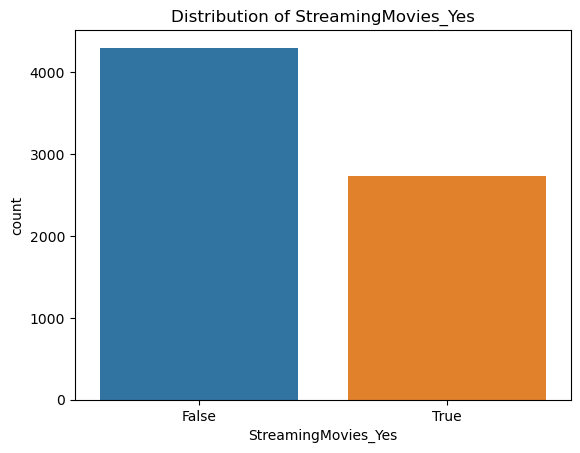

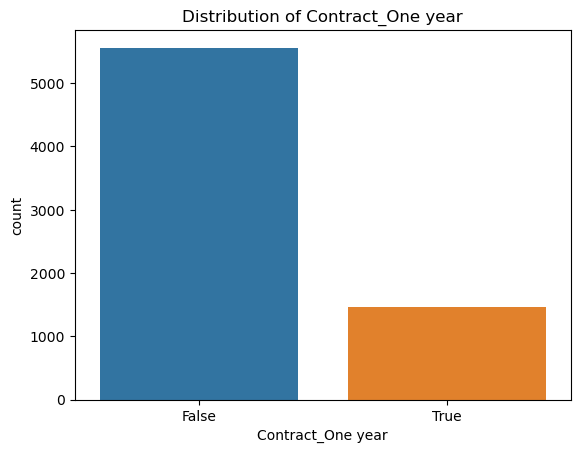

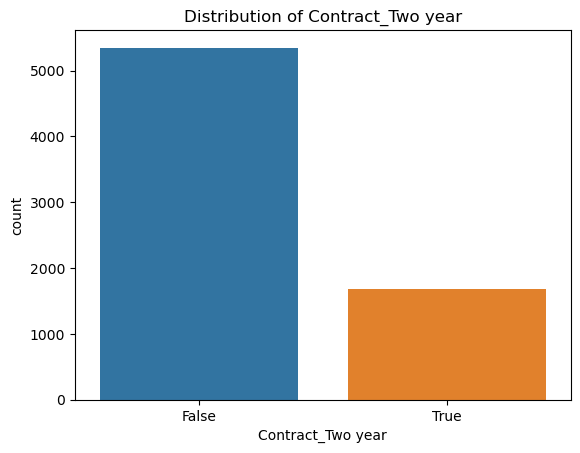

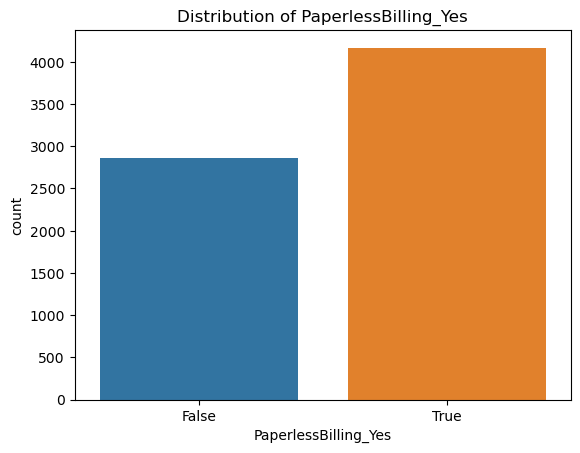

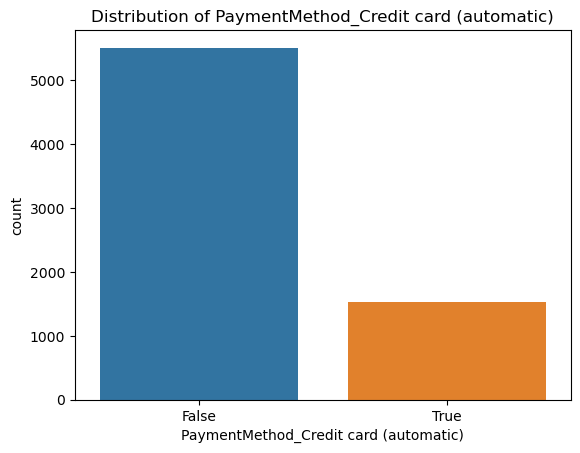

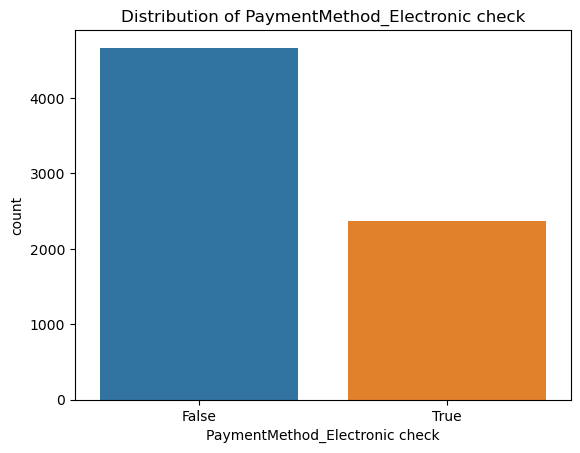

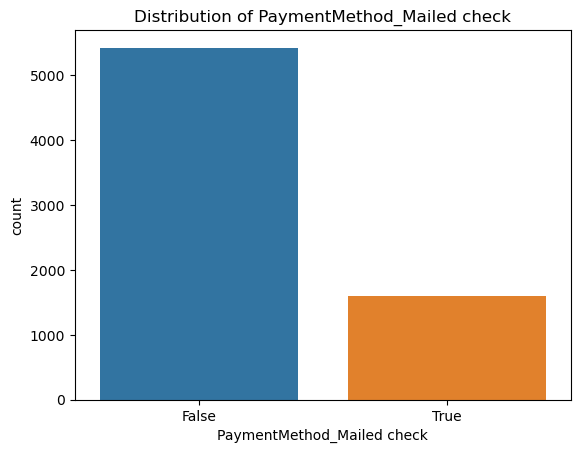

In [524]:
# List of the new one-hot encoded features
encoded_features = ['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
                    'MultipleLines_No phone service', 'MultipleLines_Yes','InternetService_Fiber optic', 'InternetService_No',
                    'OnlineSecurity_No internet service', 'OnlineSecurity_Yes','OnlineBackup_No internet service', 'OnlineBackup_Yes',
                    'DeviceProtection_No internet service', 'DeviceProtection_Yes','TechSupport_No internet service', 'TechSupport_Yes',
                    'StreamingTV_No internet service', 'StreamingTV_Yes','StreamingMovies_No internet service', 'StreamingMovies_Yes',
                    'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check' ]

for feature in encoded_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()


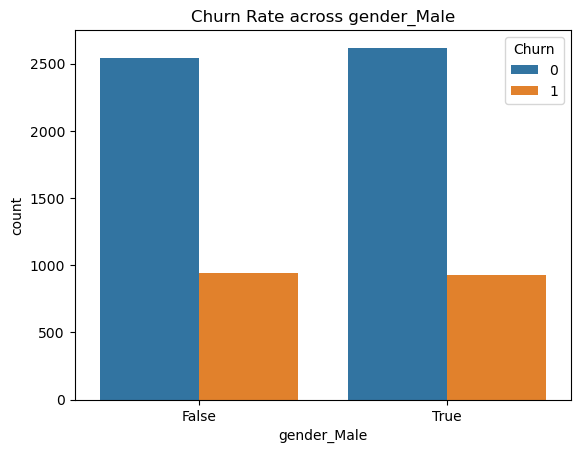

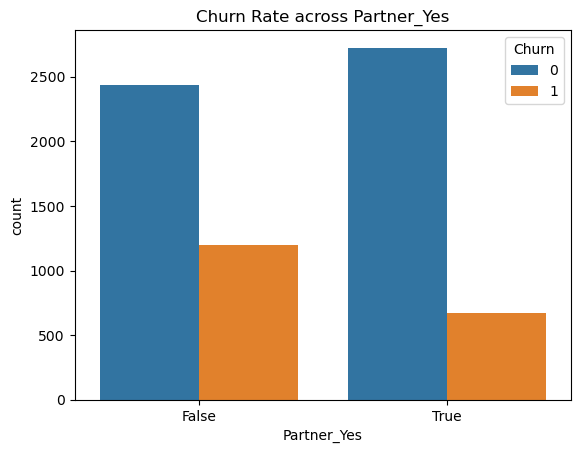

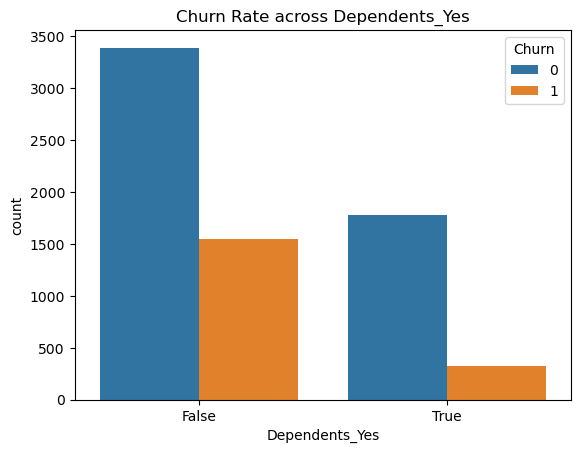

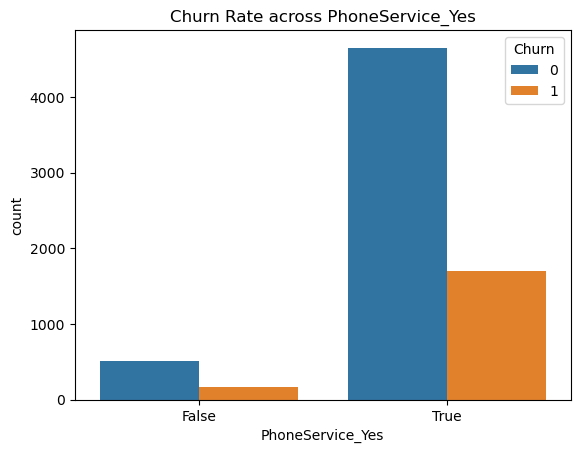

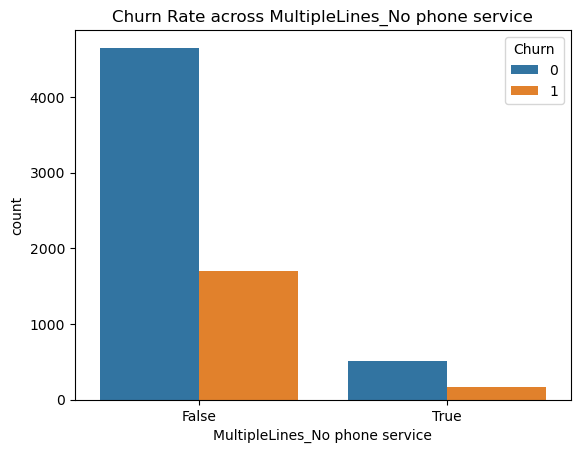

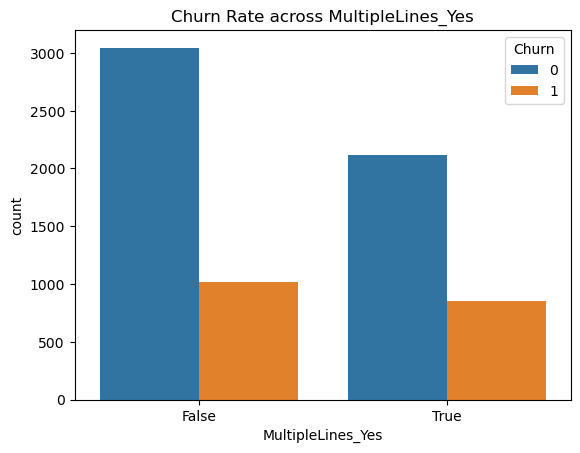

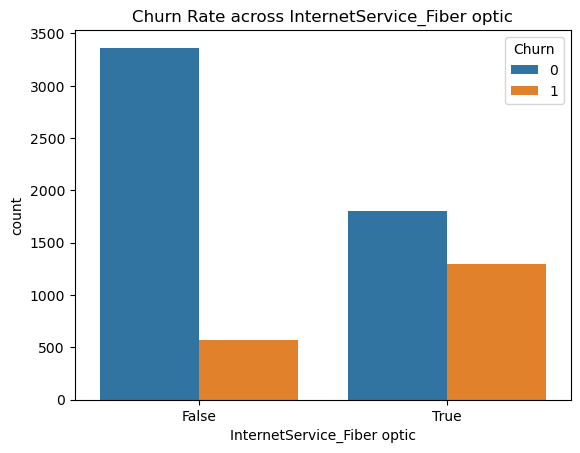

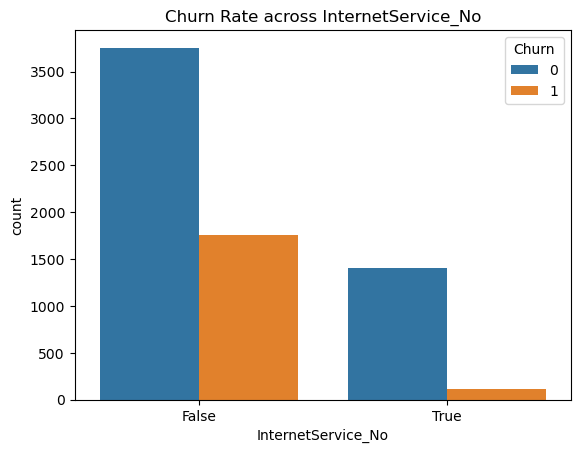

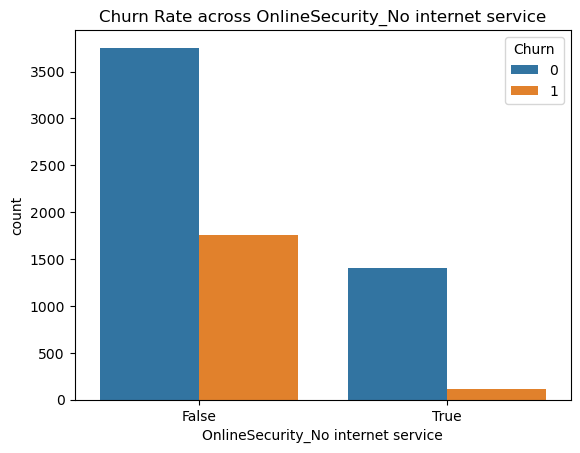

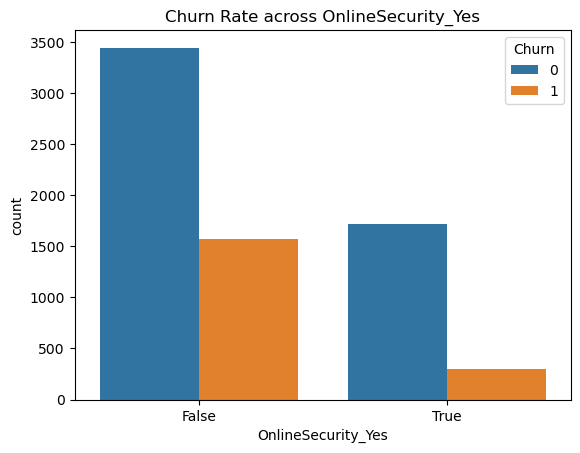

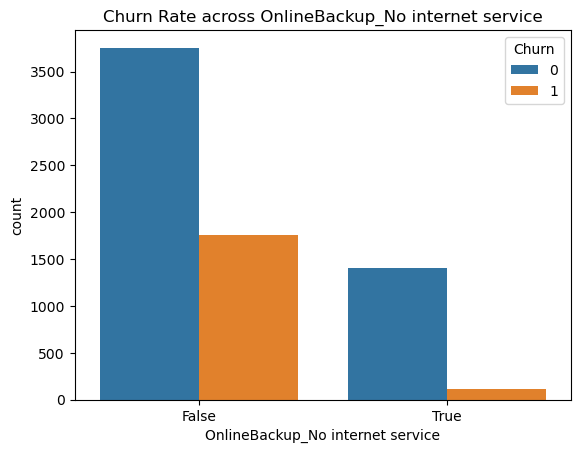

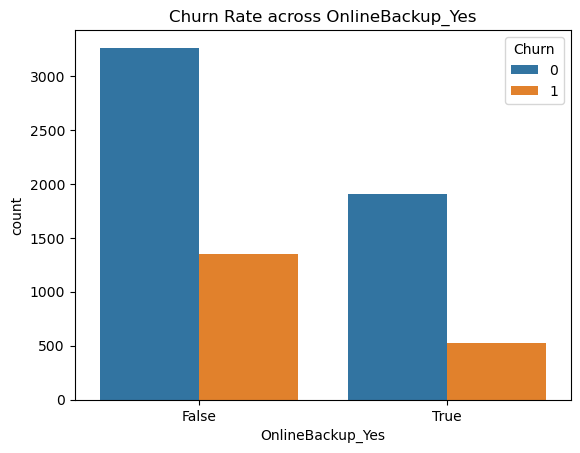

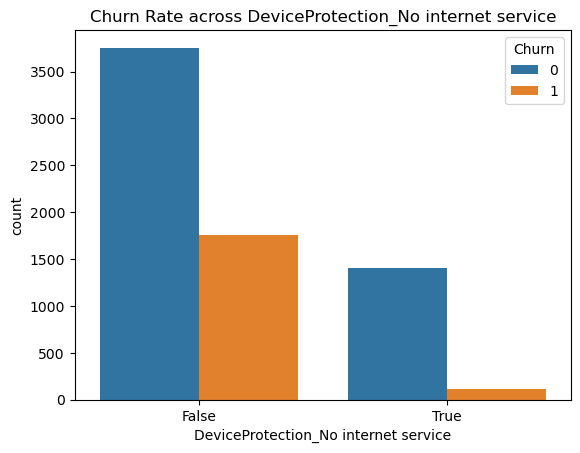

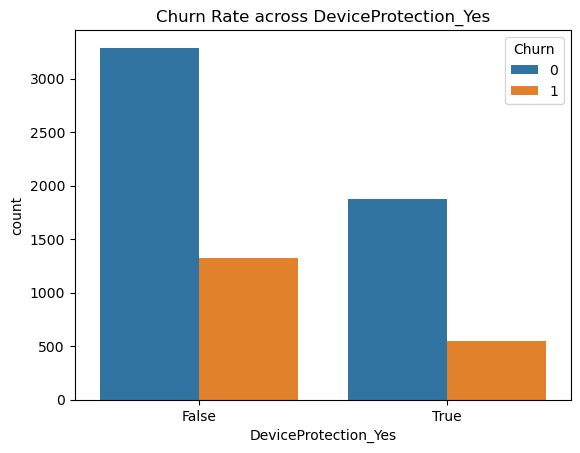

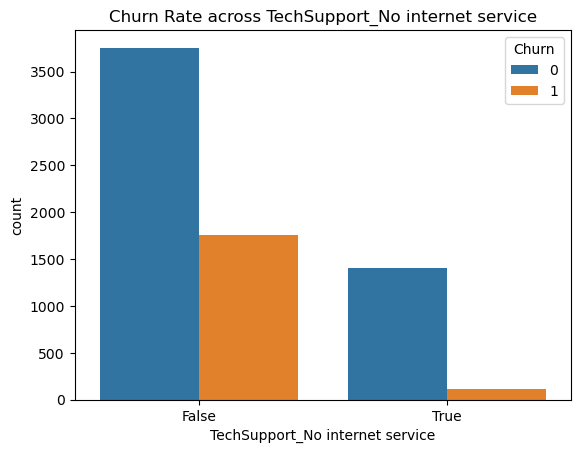

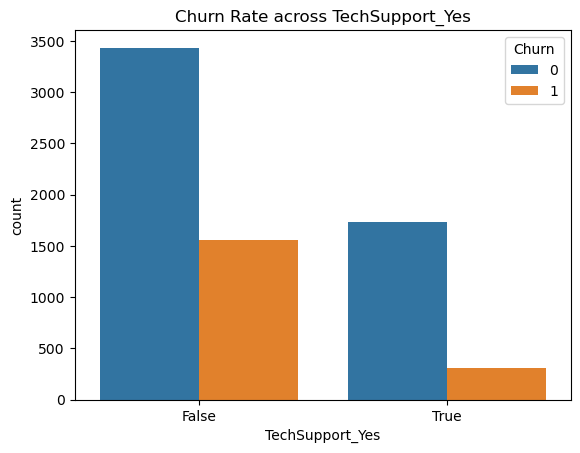

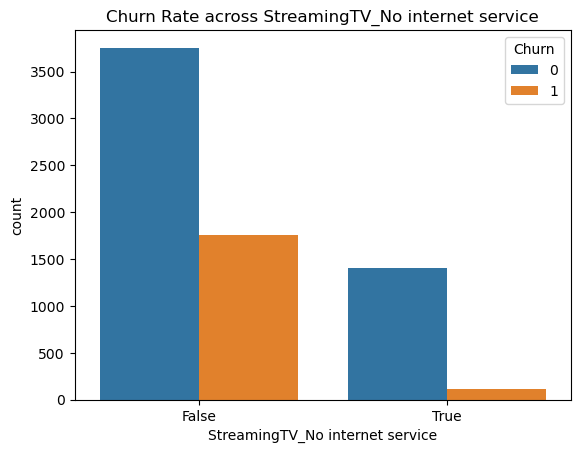

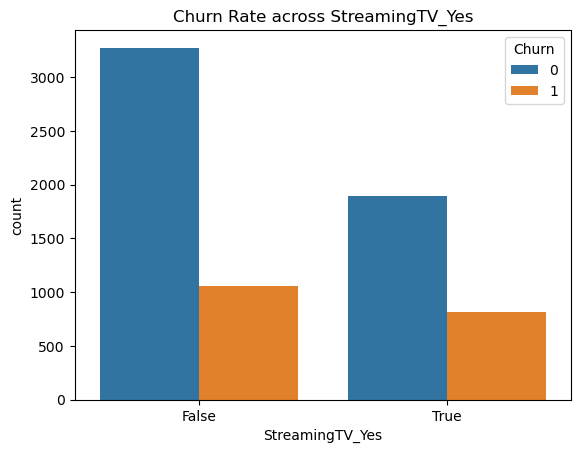

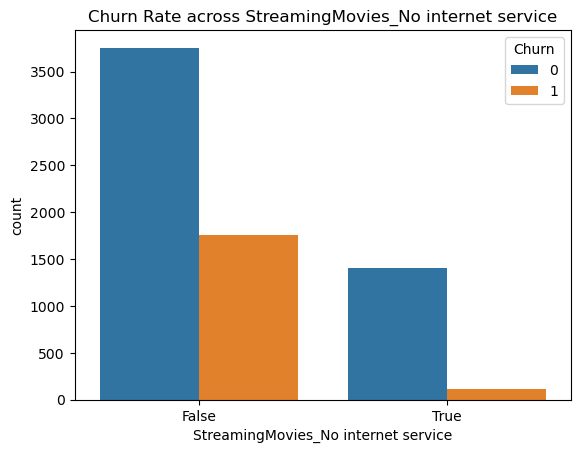

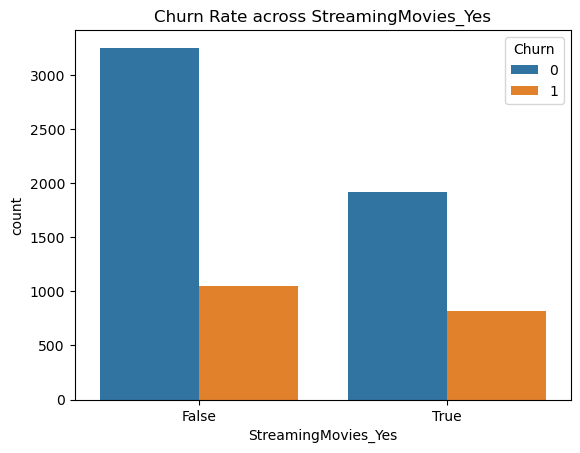

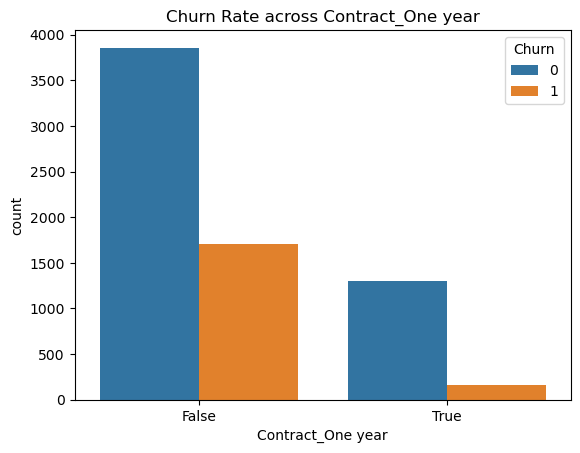

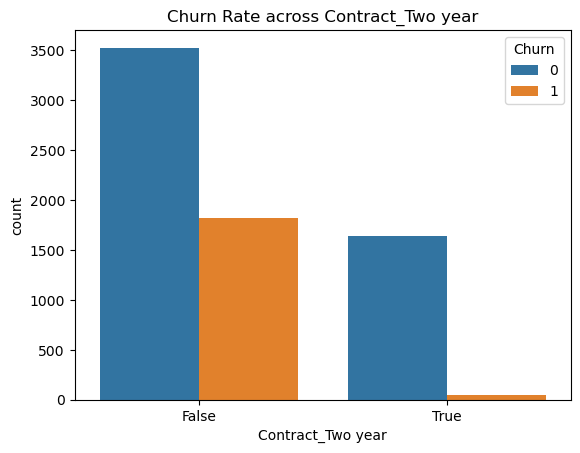

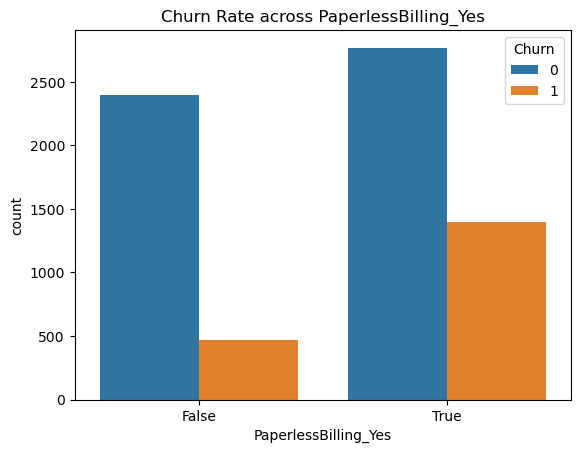

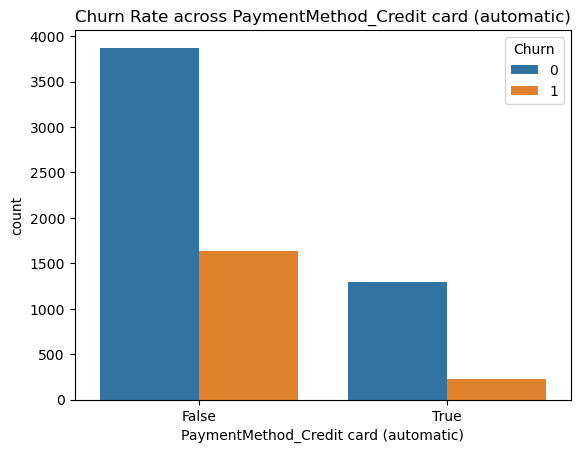

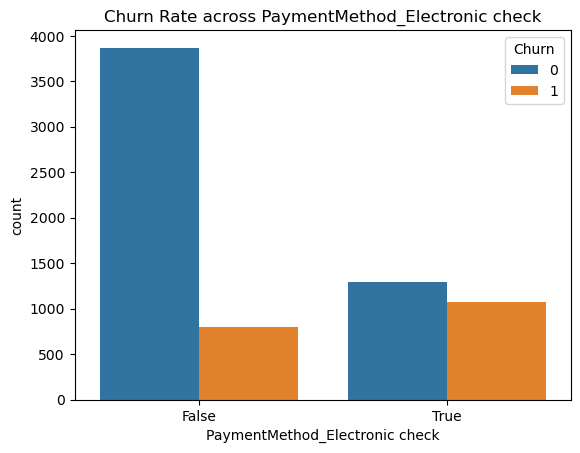

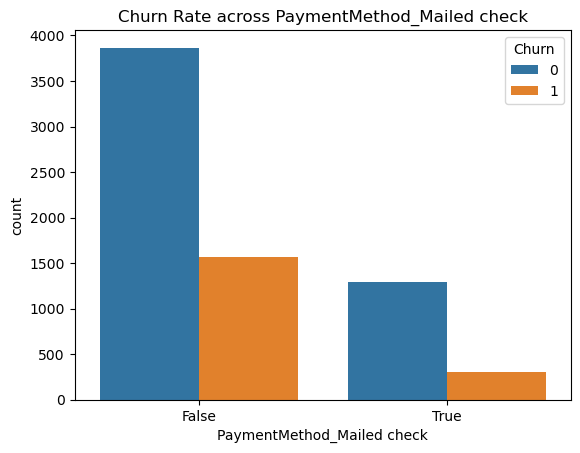

In [525]:
for feature in encoded_features:
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Rate across {feature}')
    plt.show()

**Relationship Between Features and Churn**

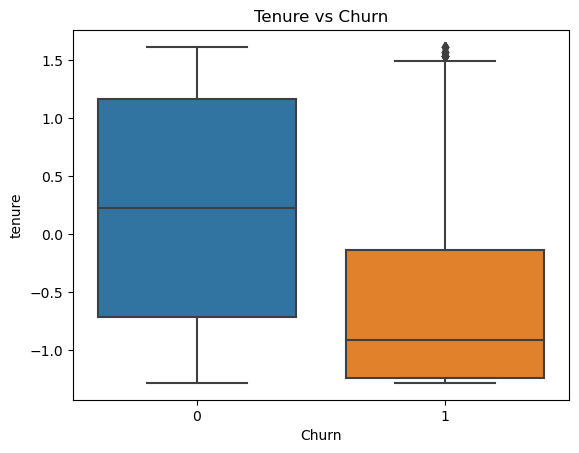

In [526]:
# Boxplot to analyze tenure vs churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

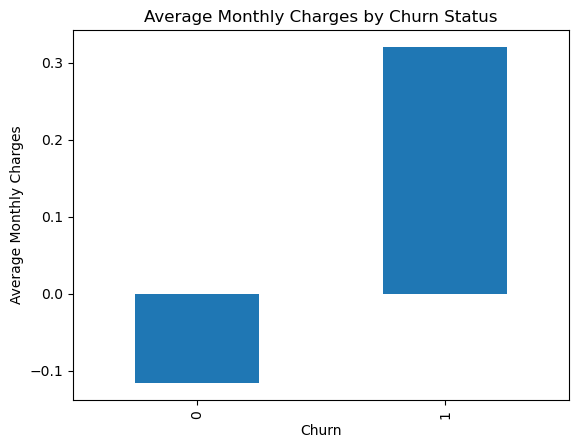

In [527]:
# Bar plot for average monthly charges per churn status
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charges by Churn Status')
plt.ylabel('Average Monthly Charges')
plt.show()

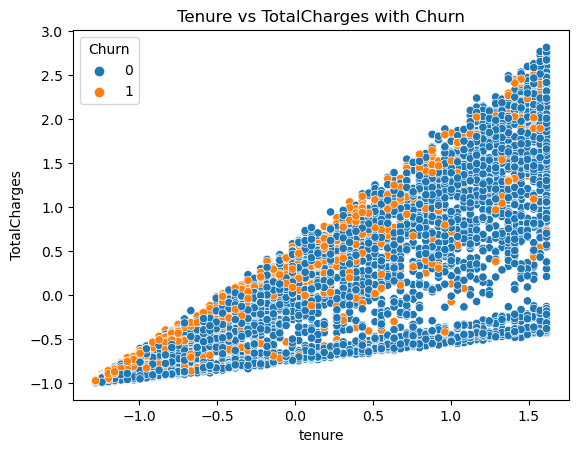

In [528]:
# Scatter plot to analyze the relationship between TotalCharges and tenure
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title('Tenure vs TotalCharges with Churn')
plt.show()

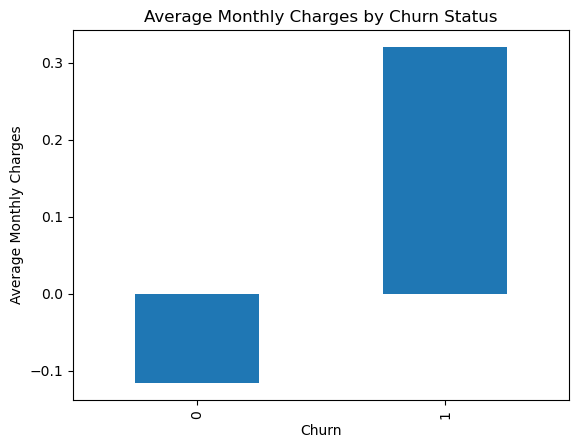

In [529]:
# Bar plot for average monthly charges per churn status
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charges by Churn Status')
plt.ylabel('Average Monthly Charges')
plt.show()

In [530]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_MonthlyCharges', 'AvgMonthlyCharge', 'Log_TotalCharges',
       'TenureGroup', 'IsSeniorCitizen', 'HasDependentsAndPartner',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
 

In [531]:
# Segment by contract type and payment method
behavior_segments = df.groupby(['Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)',
                                'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',])['Churn'].mean().reset_index()
print(behavior_segments)


    Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0               False              False                 False   
1               False              False                 False   
2               False              False                 False   
3               False              False                 False   
4               False              False                  True   
5               False              False                  True   
6               False              False                  True   
7               False              False                  True   
8               False               True                 False   
9               False               True                 False   
10              False               True                 False   
11              False               True                 False   
12              False               True                  True   
13              False               True                  True   
14        

In [532]:
df['TotalServices'] = (df['OnlineSecurity_Yes'].astype(int) + 
                       df['OnlineBackup_Yes'].astype(int) + 
                       df['DeviceProtection_Yes'].astype(int) + 
                       df['TechSupport_Yes'].astype(int) +
                       df['StreamingTV_Yes'].astype(int) +
                       df['StreamingMovies_Yes'].astype(int))


In [533]:
# Segment by number of services subscribed to
df['ServiceLevel'] = pd.cut(df['TotalServices'], bins=[0, 2, 4, 6], labels=['Low', 'Medium', 'High'])
service_segments = df.groupby('ServiceLevel')['Churn'].mean().reset_index()
print(service_segments)

  ServiceLevel     Churn
0          Low  0.406203
1       Medium  0.252161
2         High  0.100821


In [534]:
# Segment by senior citizen status and gender
demographic_segments = df.groupby(['IsSeniorCitizen', 'gender_Male'])['Churn'].mean().reset_index()
print(demographic_segments)


   IsSeniorCitizen  gender_Male     Churn
0                0        False  0.239794
1                0         True  0.233277
2                1        False  0.422535
3                1         True  0.411150


In [535]:
# Segment by tenure groups
tenure_segments = df.groupby('TenureGroup')['Churn'].mean().reset_index()
print(tenure_segments)


   TenureGroup     Churn
0            0  0.476782
1            1  0.287109
2            2  0.203890
3            3  0.144231
4            4  0.066098


In [536]:
# Segment by customer service usage
if 'CustomerServiceCalls' in df.columns:
    support_segments = df.groupby('HighServiceUsage')['Churn'].mean().reset_index()
    print(support_segments)


In [537]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = df[['tenure', 'MonthlyCharges', 'TotalServices']]
features_scaled = StandardScaler().fit_transform(features)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['CustomerSegment'] = kmeans.fit_predict(features_scaled)

# Analyzing churn rate by segments
segment_analysis = df.groupby('CustomerSegment')['Churn'].mean().reset_index()
print(segment_analysis)


c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   CustomerSegment     Churn
0                0  0.144335
1                1  0.153553
2                2  0.471861


In [538]:
df['Churn'].head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Model Development

**Train-Test Split**

In [539]:
from sklearn.model_selection import train_test_split

In [540]:
df.isna().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                                0
Churn                                       0
Tenure_MonthlyCharges                       0
AvgMonthlyCharge                            0
Log_TotalCharges                            0
TenureGroup                                 0
IsSeniorCitizen                             0
HasDependentsAndPartner                     0
gender_Male                                 0
Partner_Yes                                 0
Dependents_Yes                              0
PhoneService_Yes                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No internet service  

In [541]:
categorical_columns = df.select_dtypes(include=['category']).columns
print(categorical_columns)

Index(['ServiceLevel'], dtype='object')


In [542]:
df[categorical_columns] = df[categorical_columns].astype('object')

In [543]:
# Example: Fill NaNs with a specific value or drop rows/columns
df = df.fillna('Unknown')  # or df.dropna() depending on your strategy

In [544]:
df[categorical_columns] = df[categorical_columns].astype('category')

In [545]:
le = LabelEncoder()
df['ServiceLevel'] = le.fit_transform(df['ServiceLevel'])

In [555]:
X = df.drop(columns=['Churn'])  # Drop unnecessary columns
y = df['Churn']

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Models

**Logistic Regression**

In [557]:
X_train.dtypes

SeniorCitizen                              int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
Tenure_MonthlyCharges                    float64
AvgMonthlyCharge                         float64
Log_TotalCharges                         float64
TenureGroup                                int64
IsSeniorCitizen                            int64
HasDependentsAndPartner                    int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No inte

In [558]:
X_train.head()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
6021              0  0.430998       -0.523477     -0.091370   
3404              0 -1.198760       -0.378881     -0.924111   
5474              0  0.919926        0.430523      0.959516   
5515              0  0.512486       -0.337331      0.119297   
6328              0  0.919926        1.200040      1.396490   

      Tenure_MonthlyCharges  AvgMonthlyCharge  Log_TotalCharges  TenureGroup  \
6021                2109.15         48.283721          7.638776            2   
3404                 160.20         62.900000          5.245444            0   
5474                4276.25         81.057273          8.402713            3   
5515                2459.25         56.748889          7.845690            2   
6328                5549.50         99.065455          8.603297            3   

      IsSeniorCitizen  HasDependentsAndPartner  ...  StreamingMovies_Yes  \
6021                0                        0  ...                 True   
3404                0                        0  ...                False   
5474                0                        0  ...                False   
5515                0                        0  ...                False   
6328                0                        0  ...                 True   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
6021              False              False                  True   
3404              False              False                 False   
5474              False              False                  True   
5515              False               True                 False   
6328               True              False                 False   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6021                                  False                           False   
3404                                   True                           False   
5474                                  False                            True   
5515                                  False                           False   
6328                                  False                           False   

      PaymentMethod_Mailed check  TotalServices  ServiceLevel  CustomerSegment  
6021                       False              3             2                1  
3404                       False              1             1                2  
5474                       False              1             1                1  
5515                       False              2             1                2  
6328                        True              3             2                1  

[5 rows x 39 columns]

In [559]:
y_train.head()

6021    1
3404    1
5474    1
5515    0
6328    0
Name: Churn, dtype: int64

In [560]:
y_train.isnull().sum()

0

In [561]:
import numpy as np
from sklearn.impute import SimpleImputer

# Ensure y_train is a numpy array; convert if necessary
y_train = y_train.to_numpy()  # or y_train.values for older pandas versions

# Initialize SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Reshape y_train for imputation and then flatten it back
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()

# If X_train also has missing values, apply the same imputer on it
X_train = imputer.fit_transform(X_train)  # Assuming X_train is a 2D array

In [562]:
y_train.shape

(5625,)

In [563]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("AUC:", roc_auc_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression
Accuracy: 0.7953091684434968
AUC: 0.6985546484720792
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



**Random Forest**

In [564]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 0.7974413646055437
AUC: 0.6965952446278167
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**Gradient Boosting Machine (GBM)**

In [565]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm.predict(X_test)

# Evaluation
print("Gradient Boosting Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("AUC:", roc_auc_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

Gradient Boosting Machine
Accuracy: 0.7945984363894811
AUC: 0.6972177500763572
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


**Neural Networks**

In [566]:
from sklearn.neural_network import MLPClassifier

# Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluation
print("Neural Network")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("AUC:", roc_auc_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Neural Network
Accuracy: 0.7917555081734187
AUC: 0.6893115426228575
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


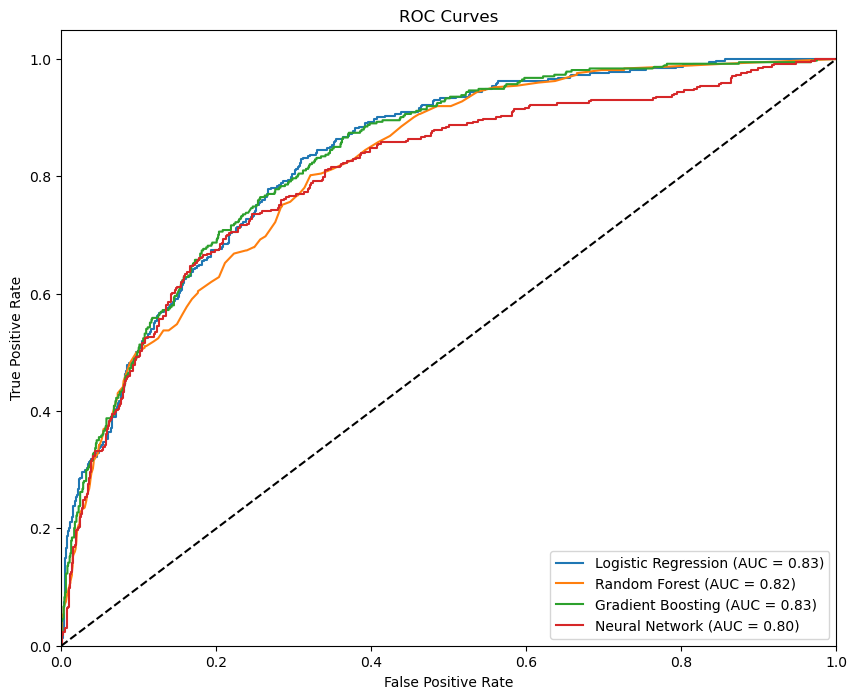

In [567]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves
def plot_roc(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for model_name, model in models.items():
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

# Dictionary of models
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'Gradient Boosting': gbm,
    'Neural Network': mlp
}

# Plotting ROC curves for each model
plot_roc(models, X_test, y_test)


In [568]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score: ", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best AUC score:  0.8450679018844088


In [569]:
pip install shap

Note: you may need to restart the kernel to use updated packages.Collecting shap
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata

  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ------ --------------------------------- 71.7/456.1 kB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 81.9/456.1 kB 1.1 MB/s eta 0:00:01
   ---------- --------------------------- 122.9/456.1 kB 901.1 kB/s eta 0:00:01
   ----------- -------------------------- 133.1/456.1 kB 714.4 kB/s eta 0:00:01
   ---------------------- --------------- 266.2/456.1 kB 962.4 kB/s eta 0:00:01
   -------------------------- ------------

In [621]:
import shap

# Create an explainer
#explainer = shap.Explainer(logreg, X_train)

# Compute SHAP values 
#shap_values = explainer(X_test)


In [639]:
# Ensure X_test is a DataFrame with feature names
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [640]:
# Create SHAP explainer
explainer = shap.Explainer(logreg, X_train)

In [642]:
# Compute SHAP values
shap_values = explainer(X_test_df)

In [643]:
# Extract SHAP values and create a DataFrame
shap_values_data = shap_values.values
shap_values_df = pd.DataFrame(shap_values_data, columns=X_test_df.columns)


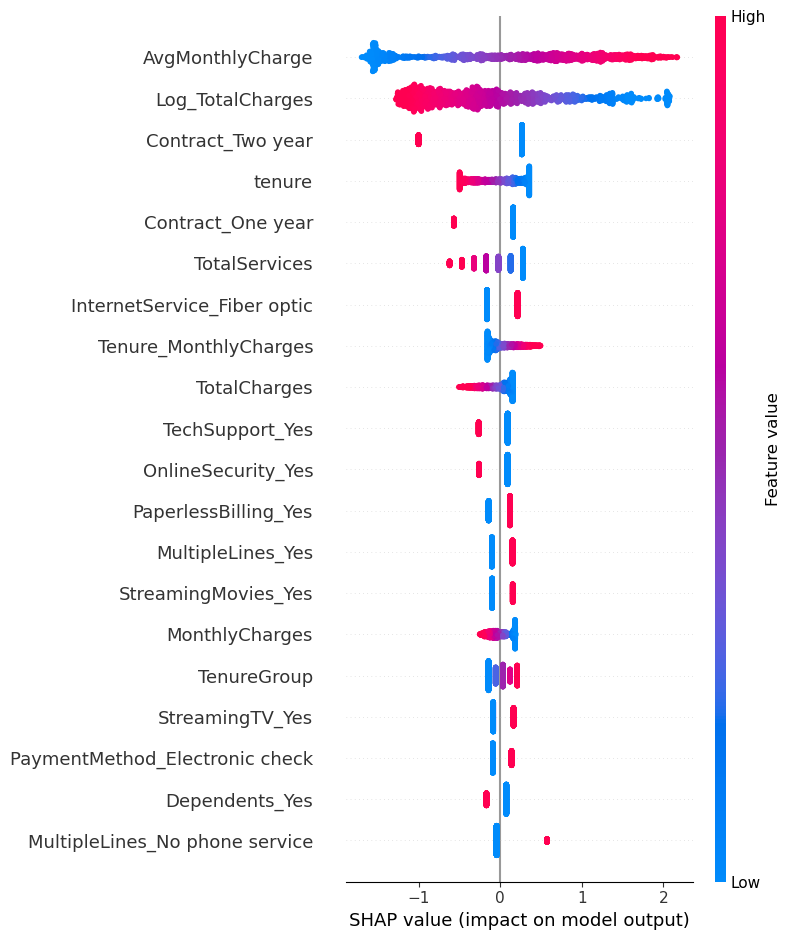

In [644]:
# Plot SHAP values
shap.summary_plot(shap_values, X_test_df)

The image you provided is a **SHAP summary plot**, which is a popular visualization technique used to interpret the impact of features on a machine learning model's predictions. 

Here's a breakdown of what the plot shows:

**Features:**

- The vertical axis lists the features in the dataset.

**SHAP Values:**

- The horizontal axis represents the SHAP values, which quantify the impact of each feature on the model's output (prediction).
- A positive SHAP value indicates that the feature increases the model's output, while a negative value indicates it decreases the output.
- The magnitude of the SHAP value represents the importance of the feature.

**Colors:**

- The color of each dot represents the feature value.
- Blue dots indicate low feature values, while red dots indicate high feature values.

**Interpretation:**

- **Feature Importance:** The length of the dots on the horizontal axis indicates the feature's importance. Longer dots suggest that the feature has a greater impact on the model's output.
- **Feature Interactions:** The clustering of dots along the horizontal axis can reveal interactions between features. If dots for two features are clustered together, it might suggest that these features interact to influence the prediction.
- **Direction of Impact:** The color of the dots shows the direction of the feature's impact. Blue dots indicate that the feature decreases the output, while red dots indicate that it increases the output.

**In this specific plot:**

- **AvgMonthlyCharge:** Appears to be the most important feature, with a wide range of SHAP values and a significant impact on the model's output.
- **Log_TotalCharges:** Also shows a considerable impact, with a clustering of dots on the positive side, suggesting it generally increases the output.
- **Contract_Two_year, Contract_One_year, tenure:** These features seem to have a moderate impact, with some clustering of dots on both positive and negative sides.
- **TotalServices:** Has a more limited impact, with most dots clustered around the 0 SHAP value.
- **InternetService_Fiber_optic, Tenure_MonthlyCharges, TotalCharges:** These features show a mix of positive and negative SHAP values, suggesting varying impacts on the model's output.
- **Other Features:** The remaining features exhibit varying levels of importance and may have interactions with each other based on the clustering of dots.

**Overall, this SHAP summary plot provides valuable insights into the relative importance of features and their interactions in influencing the model's predictions.**

**Additional Considerations:**

- **Model Complexity:** For complex models, interpreting SHAP plots can be more challenging.
- **Feature Engineering:** The choice of features can significantly impact the interpretability of the plot.
- **Domain Knowledge:** Combining SHAP insights with domain knowledge can lead to a deeper understanding of the model's behavior.

By carefully analyzing this plot and considering these factors, you can gain valuable insights into your model's decision-making process.


In [628]:
pip install lime

Note: you may need to restart the kernel to use updated packages.Collecting lime
     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 217.9 kB/s eta 0:00:02
     -------- ---------------------------- 61.4/275.7 kB 272.3 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/275.7 kB 308.0 kB/s eta 0:00:01
     ---------------- ------------------- 122.9/275.7 kB 359.9 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/275.7 kB 387.0 kB/s eta 0:00:01
     ---------------------- ------------- 174.1/275.7 kB 419.0 kB/s eta 0:00:01
     ---------------------- ------------- 174.1/275.7 kB 419.0 kB/s eta 0:00:01
     ---------------------- ------------- 174.1/275.7 kB 419.0 kB/s eta 0:00:01
     -------------------------- --------- 204.8/275.7 kB 355.7 kB/s eta 0:00:01
     -------------------------- --------- 204.8/275.

In [653]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

In [656]:
feature_names = X_train_df.columns #if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]

In [657]:
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Tenure_MonthlyCharges', 'AvgMonthlyCharge', 'Log_TotalCharges',
       'TenureGroup', 'IsSeniorCitizen', 'HasDependentsAndPartner',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tot

In [658]:
from lime.lime_tabular import LimeTabularExplainer

# Create an explainer
explainer = LimeTabularExplainer(training_data=X_train, feature_names=feature_names, mode='classification')

# Explain a prediction
exp = explainer.explain_instance(X_test[0], logreg.predict_proba)


In [659]:
exp.show_in_notebook()